#### Section 1

In [ ]:
# Create an Azure ML Workspace using Python SDK

"""
from azure.ai.ml.entities import Workspace

ws_basic = Workspace(
    name="mlw-example",
    location="eastus",
    display_name="Basic workspace-example",
    description="This example shows how to create a basic workspace",
)
ml_client.workspaces.begin_create(ws_basic)

"""


In [ ]:
# Models - The End Product

# After training, your ML model is stored as a binary file:
# Common formats: .pkl (pickle), .pt (PyTorch), .joblib, or MLflow format.

# You can:
    # Register the model in the workspace (with name and version)
    # Track versions for comparison and deployment control
    # Deploy the registered model to endpoints


"""
from azure.ai.ml.entities import Model

model = Model(name="mymodel", path="./outputs/model.pkl", type="mlflow_model")
ml_client.models.create_or_update(model)

"""

In [ ]:
# Environments – Dependency Managers

# They define:
    # Python/R packages
    # Framework versions (e.g., scikit-learn, PyTorch)
    # Environment variables

# Environments are:

    # Stored as Docker images
    # Created once and reused across training/inference
    # Pulled from the Azure Container Registry (ACR)


"""
from azure.ai.ml.entities import Environment

env = Environment(
    name="sklearn-env",
    conda_file="env.yml",
    image="mcr.microsoft.com/azureml/openmpi4.1.0-ubuntu20.04",
)
ml_client.environments.create_or_update(env)

"""

In [ ]:
# Data – File or Folder References

# Different from datastores (which store connection info), data assets are:
# Versioned references to specific files or folders
# Used in training and inference
# Authenticated once, then reused easily

# When creating a data asset, you define:
    # Name
    # Version
    # Path (e.g., to blob storage, local folder)


"""
from azure.ai.ml.entities import Data

data = Data(
    name="training-data",
    path="./data/train.csv",
    type="uri_file",
    description="Training dataset for model"
)
ml_client.data.create_or_update(data)

"""

In [ ]:
# Script as a Job (Command Job)

# Types of Jobs in Azure ML:
# Job Type	             Description
# Command Job	             Runs a single script (e.g., train.py)
# Sweep Job	             Performs hyperparameter tuning over a range of values
# Pipeline Job	         Runs multiple steps/scripts/components as a single ML pipeline

"""
from azure.ai.ml import command

job = command(
    code="./src",
    command="python train.py --data_path ${{inputs.input_data}}",
    inputs={"input_data": Input(path="azureml:my-data:1")},
    environment="my-env:1",
    compute="cpu-cluster",
)

ml_client.jobs.create_or_update(job)

"""

In [ ]:
# What is the Azure ML Python SDK (v2)?

    # The Python SDK v2 allows you to interact with your Azure ML workspace via code, using Python.
    # Connect to Your Workspace


#  Step 1: Install the SDK

"""pip install azure-ai-ml"""
    # Already installed in Azure ML notebooks (Python ≥ 3.10).


#  Step 2: Connect to Your Workspace

# Required Info:
    # subscription_id
    # resource_group
    # workspace_name

""""
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

ml_client = MLClient(
    DefaultAzureCredential(),
    subscription_id="your-subscription-id",
    resource_group="your-resource-group",
    workspace_name="your-workspace-name"
)
"""

# DefaultAzureCredential() uses your Azure login. You may need to run az login if not in an Azure-hosted environment.


# Step 3: Submit a Job (Example)

# You can now train a model, register data, deploy endpoints, etc.

"""
from azure.ai.ml import command

job = command(
    code="./src",  # folder containing your train.py
    command="python train.py",
    environment="AzureML-sklearn-0.24-ubuntu18.04-py37-cpu@latest",
    compute="cpu-cluster",
    experiment_name="train-model"
)

returned_job = ml_client.create_or_update(job)

"""

# This will:
    # Upload your code
    # Create an environment
    # Execute it on the selected compute
    # Track logs & metrics in the Studio

In [ ]:
# What is the Azure ML CLI (v2)?

    # The Azure CLI + ML extension (az ml) lets you manage Azure ML through command-line scripts, ideal for:

    # Purpose	                        Benefit
    # Automating repetitive tasks	    Avoid manual steps across dev/test/prod environments
    # CI/CD pipelines	                Integrate with GitHub Actions, Azure DevOps, etc.
    # Infrastructure as code (IaC)	    Use YAML to define reproducible resources like compute, jobs

# Step 1: Install the Azure CLI
    # Install using your platform’s package manager:
        # Windows: Use winget or MSI
        # macOS: Use brew
        # Linux: Use apt, dnf, or zypper

# Step 2: Install Azure ML Extension
    #   'az extension add -n ml -y'
    # Then check:
    #   'az ml -h'

# Step 3: Basic Command Structure
    # Every Azure ML CLI v2 command starts with:
    # 'az ml <resource_type> <action>'

# Example:
# Create a compute cluster:
        #        """az ml compute create \
        #         --name aml-cluster \
        #         --size STANDARD_DS3_v2 \
        #         --min-instances 0 \
        #         --max-instances 5 \
        #         --type AmlCompute \
        #         --resource-group my-resource-group \
        #         --workspace-name my-workspace"""

#  Step 4: Use YAML for Reusability'

""" compute.yml:

$schema: https://azuremlschemas.azureedge.net/latest/amlCompute.schema.json 
name: aml-cluster
type: amlcompute
size: STANDARD_DS3_v2
min_instances: 0
max_instances: 5 """

In [ ]:
"""
Tool	               Best For	                                                                  User Type	                        Interface Type
Azure ML Studio	       Quick exploration, UI-based operations, debugging jobs	                  Beginners / Data Scientists	    Web GUI
Python SDK (v2)	       Full automation in Python, scripting ML workflows, programmatic access	  Data Scientists / ML Engineers	Code (Python)
Azure CLI (v2)	       Infrastructure setup, DevOps, automation scripts using YAML	              Admins / DevOps / ML Engineers	Command-line interface

"""

#  When to Use Each Tool — With Scenarios

# Azure ML Studio 

    # Use When:
        # You want to quickly explore and monitor your workspace
        # Running AutoML experiments without code
        # Viewing past job logs, datasets, models visually
        # You need to debug a failed pipeline or job
        # Collaborating with non-technical stakeholders

    # Example Scenarios:

        # Visualizing model performance
        # Manually triggering an AutoML run
        # Checking compute cluster status and utilization

# Python SDK (v2)

    # Use When:
        # You are writing ML workflows in Python
        # Need to create data assets, submit training jobs, or register models programmatically
        # Doing hyperparameter tuning or advanced pipelines
        # You want reproducibility and code version control
        # Integrating ML code into a Python project or Jupyter notebook

    # Example Scenarios:
        # Training a model and tracking metrics via Python
        # Registering multiple models inside a for-loop
        # Automating pipeline runs based on data drift

# Azure CLI (v2)
    # Use When:
        # You are automating infrastructure setup
        # Working with DevOps/CI-CD pipelines
        # Managing compute targets, environments, and workspaces using YAML files
        # You want a lightweight, terminal-only workflow
        # Creating quick shell scripts to repeat setup across environments

    # Example Scenarios:
        # Creating and scaling compute clusters in multiple regions
        # Automating setup of test/dev/prod environments
        # Registering assets from GitHub workflows

In [ ]:
""""
What is a URI in Azure ML?

    A URI (Uniform Resource Identifier) is simply a path that points to your data, whether it's:
        On your local machine
        In the cloud (e.g., Azure Blob Storage, Azure Data Lake)
        In an Azure ML datastore
        Azure ML needs these URIs to find, access, and load your data during training or inference.

Common URI Protocols in Azure ML

    Protocol	When to Use	Example Use Case
    https://	For data in public/private blob storage or websites	Accessing data directly via URL (e.g., CSV file)
    abfss://	For data in Azure Data Lake Gen2	Used in big data projects, often with Spark
    azureml://	For data in a datastore registered in Azure ML	Recommended in production, avoids auth handling


Why prefer azureml://?

    You avoid embedding secrets or SAS tokens in your code
    Azure ML handles authentication behind the scenes
    Supports versioning and reusable data assets


Summary

| Topic                   | Key Takeaway                                                       |
| ----------------------- | ------------------------------------------------------------------ |
| URI                     | Points to the **location of your data**                            |
| azureml://              | Recommended in production for **secure and reusable** access       |
| https\:// and abfss\:// | Good for quick access; may require SAS tokens or auth              |
| Datastore               | Stores auth info + reference to storage; used in `azureml://` URIs |

"""

In [ ]:
"""
What is a Datastore in Azure ML?

    A datastore is a secure pointer (or reference) to an external data storage service like:
        Azure Blob Storage
        Azure Data Lake Gen2
        Azure File Share

    Think of it as a “connector + authenticator” — once you create a datastore, you can refer to data using just its name, without writing credentials or connection code every time.

Why Use a Datastore?

    | Benefit                       | Explanation                                                                  |
    | ----------------------------- | ---------------------------------------------------------------------------- |
    | ✅ Secure                      | Secrets (keys/tokens) are stored, **not hardcoded in scripts**               |
    | ✅ Reusable                    | Use `azureml://datastores/<name>` to easily reference the data               |
    | ✅ Role-based control          | Users can access data via Azure ML without direct access to storage accounts |
    | ✅ Integrates with data assets | Makes it easy to version and manage datasets                                 |

Authentication Methods

    | Method               | Used When…                                                        |
    | -------------------- | ----------------------------------------------------------------- |
    | **Credential-based** | Use **Account Key** or **SAS token** for fast setup               |
    | **Identity-based**   | Use **Microsoft Entra ID (formerly AAD)** for enterprise security |

Built-in Datastores

    Each workspace includes 4 default datastores:
        workspaceblobstore (default blob container)
        workspaceartifactstore (for logs/outputs)
        workspacefilestore, workspaceworkingdirectory (for notebooks/file shares)

"""

## How to Create a Datastore (Azure Blob Example)

"1) Option 1: Using Account Key"

""" 
from azure.ai.ml.entities import AzureBlobDatastore
from azure.ai.ml.entities._credentials import AccountKeyConfiguration

blob_datastore = AzureBlobDatastore(
    name = "blob_example",
    description = "Datastore pointing to a blob container",
    account_name = "mytestblobstore",
    container_name = "data-container",
    credentials = AccountKeyConfiguration(
        account_key="XXXxxxXXXxXXXXxxXXX"  # Secure in real use!
    ),
)
ml_client.create_or_update(blob_datastore)

"""

"2)  Option 2: Using SAS Token"

"""
from azure.ai.ml.entities import AzureBlobDatastore
from azure.ai.ml.entities._credentials import SasTokenConfiguration

blob_datastore = AzureBlobDatastore(
    name = "blob_sas_example",
    description = "Datastore pointing to a blob container",
    account_name = "mytestblobstore",
    container_name = "data-container",
    credentials = SasTokenConfiguration(
        sas_token="?sv=2023...YourTokenHere..."
    ),
)
ml_client.create_or_update(blob_datastore)

"""

In [ ]:
""" 
What is a Data Asset?

    A Data Asset in Azure ML is a versioned reference to a file, folder, or tabular dataset that:
        Points to a storage location (local, blob, data lake, URL, or datastore)
        Hides credentials
        Can be reused in jobs, pipelines, and AutoML
        Supports versioning and metadata

Why Use Data Assets Instead of Paths?

| Benefit       | Explanation                                        |
| ------------- | -------------------------------------------------- |
| ✅ Reusability | Easily reused across jobs without redefining paths |
| ✅ Security    | Secrets are stored in datastores, not in code      |
| ✅ Versioning  | Track changes to your datasets (v1, v2, etc.)      |
| ✅ Integration | Needed for **AutoML**, **ML pipelines**, and more  |

Types of Data Assets

| Type           | Points to…    | Best Use Case                                            |
| -------------- | ------------- | -------------------------------------------------------- |
| **URI File**   | A single file | CSV, JSON, TXT files as input/output                     |
| **URI Folder** | A folder      | Multiple files (e.g., batch data, image folders)         |
| **MLTable**    | Tabular data  | Complex tables, AutoML, schema-driven training pipelines |

"""

##  How to Create Each Type

"1) URI File (Single File Reference)"

""" 
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

my_data = Data(
    path="azureml://datastores/mydatastore/paths/data/diabetes.csv",
    type=AssetTypes.URI_FILE,
    name="diabetes-file",
    version="1",
    description="Single CSV file for diabetes data"
)

ml_client.data.create_or_update(my_data)
"""

"1.1) Usage in script:"

"""
parser = argparse.ArgumentParser()
parser.add_argument("--input_data", type=str)
args = parser.parse_args()

df = pd.read_csv(args.input_data)
"""

"2) URI Folder (Folder Reference)"

"""
my_data = Data(
    path="azureml://datastores/mydatastore/paths/data/folder/",
    type=AssetTypes.URI_FOLDER,
    name="training-folder",
    version="1",
    description="Training data folder"
)
ml_client.data.create_or_update(my_data)
"""

"2.1) Usage in script:"

""" 
all_files = glob.glob(args.input_data + "/*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files), sort=False)
"""

"3) 3. MLTable (Tabular Data with Schema)"

# Folder Structure
""" 
/my-dataset/
│
├── diabetes.csv
└── MLTable

"""

# MLTable YAML:

""" 
type: mltable
paths:
  - pattern: ./diabetes.csv
transformations:
  - read_delimited:
      delimiter: ","
      encoding: ascii
      header: all_files_same_headers

"""

# Python code:

""" 
my_data = Data(
    path="./my-dataset/",
    type=AssetTypes.MLTABLE,
    name="diabetes-table",
    version="1",
    description="MLTable dataset for AutoML"
)
ml_client.data.create_or_update(my_data)

"""

"3.1) Usage in script:"
""" 
import mltable
tbl = mltable.load(args.input_data)
df = tbl.to_pandas_dataframe()
"""

# Summary
"""
| Asset Type | Use Case                              | Input Format     | Used in AutoML?  |
| ---------- | ------------------------------------- | ---------------- | ---------------- |
| URI File   | Single file (CSV, JSON, etc.)         | Path to a file   | ❌                |
| URI Folder | Folder with multiple files            | Path to folder   | ❌                |
| MLTable    | Structured tabular data (with schema) | Folder + MLTable | ✅ **(Required)** | """


In [ ]:
""" 
What is a Compute Target in Azure ML?
    A compute target is a cloud (or hybrid) machine where:
        You run your notebooks
        Submit training/inference jobs
        Host real-time or batch models

Types of Compute Targets & When to Use

    | Compute Type           | Description & Use Case                                                 |
    | ---------------------- | ---------------------------------------------------------------------- |
    | **Compute Instance**   | Like a VM for **interactive dev**, notebooks, EDA, and prototyping     |
    | **Compute Cluster**    | Auto-scalable VMs for **training jobs, pipelines, batch scoring**      |
    | **Kubernetes Cluster** | Attach AKS for **real-time inference** or **customized deployments**   |
    | **Attached Compute**   | Use existing Azure VMs, Databricks, or Spark clusters (external)       |
    | **Serverless Compute** | Auto-managed compute for **lightweight, quick training or batch jobs** |

    
"Best Practices by Scenario"

1. Experimentation & Notebooks

| Goal                        | Recommendation                 |
| --------------------------- | ------------------------------ |
| Run Jupyter notebooks       | ✅ **Compute Instance**         |
| Need distributed Spark code | ✅ **Serverless Spark Compute** |
Why? You want a long-running, interactive VM-like environment that’s easy to pause/resume.

2. Model Training for Production

| Goal                               | Recommendation           |
| ---------------------------------- | ------------------------ |
| Scalable training jobs (Python)    | ✅ **Compute Cluster**    |
| Simple, lightweight training       | ✅ **Serverless Compute** |
| Distributed training (large scale) | ✅ **Cluster with GPU**   |
Why? Compute clusters are on-demand and scalable — cost-effective for batch jobs or retraining.

3. Model Deployment

| Deployment Mode       | Recommendation                                             |
| --------------------- | ---------------------------------------------------------- |
| **Real-time** scoring | ✅ **Managed online endpoints** *(serverless containers)*   |
| Custom inference env  | ✅ **Kubernetes (AKS)** or **Arc-enabled K8s (on-prem)**    |
| **Batch** predictions | ✅ **Compute Cluster** or **Serverless Compute + Pipeline** |
Why? Real-time needs always-on containers. Batch jobs need scalable on-demand power.

"""

# Summary

""" 
| Scenario                   | Best Compute Type             |
| -------------------------- | ----------------------------- |
| Notebooks, EDA             | Compute Instance              |
| Prototyping (quick jobs)   | Serverless Compute            |
| Large-scale training       | Compute Cluster (CPU/GPU)     |
| Real-time inference (REST) | Managed Online Endpoint / AKS |
| Batch inference            | Compute Cluster / Serverless  |
| Spark-based processing     | Serverless Spark / Synapse    |

"""

In [ ]:
""" 
What is a Compute Instance in Azure ML?

    A Compute Instance (CI) is a personal VM managed by Azure ML, used mainly for:
        Running Jupyter notebooks
        Doing EDA (Exploratory Data Analysis)
        Writing and testing scripts interactively
        Installing custom libraries/tools
    It's like a cloud-based dev machine just for you.
"""

# How to Create a Compute Instance (via SDK)

""" 
from azure.ai.ml.entities import ComputeInstance

ci = ComputeInstance(
    name="ci-aswini123",            # must be unique in region
    size="STANDARD_DS3_v2"          # VM size (CPU/RAM config)
)

ml_client.begin_create_or_update(ci).result()
"""

""" 
Assigning a Compute Instance
    Only one user can use a CI at a time
    You can assign it to yourself or someone else (if you’re an admin)
    Prevents parallel workloads (better security & simplicity)
"""

# Cost Management Tips

"""
| Tip                                 | Why It Helps                               |
| ----------------------------------- | ------------------------------------------ |
| ✅ **Auto-stop on idle**             | Avoids charges when unused for long time   |
| ✅ **Schedule shutdown (e.g. 8 PM)** | Prevents "forgotten" running VMs overnight |
| ✅ **Start/Stop manually**           | Full control when you actively need it     | """

# Summary 

"""
| Concept                 | Key Insight                                                     |
| ----------------------- | --------------------------------------------------------------- |
| Compute Instance        | Personal VM for dev, Jupyter notebooks, interactive use         |
| Unique Name Requirement | Names must be globally unique per Azure region                  |
| Assigning to Users      | Only one user per CI; assign at creation or via portal          |
| Cost Optimization       | Auto-stop on idle, scheduled shutdown                           |
| Use With Studio/VSCode  | Directly integrate CI into notebooks or VS Code remote sessions | """



In [ ]:
""" 
Compute Cluster?
    A Compute Cluster is an auto-scalable group of VMs in Azure Machine Learning used for:
        Training ML models at scale
        Running pipeline jobs
        Executing AutoML experiments
        Performing hyperparameter sweeps
        It scales out when jobs are submitted and scales down (even to 0) when idle — saving cost.
"""

# Creating a Compute Cluster (Python SDK)

""" 
from azure.ai.ml.entities import AmlCompute

cluster = AmlCompute(
    name="cpu-cluster",
    type="amlcompute",
    size="STANDARD_DS3_v2",  # Choose based on CPU/GPU needs
    location="eastus",       # Match your workspace location
    min_instances=0,         # No cost when idle
    max_instances=2,         # Can run 2 jobs in parallel
    idle_time_before_scale_down=120,  # 2 mins
    tier="low_priority"      # Cost-saving, not guaranteed
)

ml_client.begin_create_or_update(cluster).result()

"""

# When to Use Compute Clusters

""" 
| Use Case                             | Why It Works Well                          |
| ------------------------------------ | ------------------------------------------ |
| Training large models                | Scales compute based on demand             |
| Hyperparameter tuning (sweeps)       | Allows **parallel runs** on multiple nodes |
| Pipelines (multi-step training jobs) | Ensures each step has compute when needed  |
| AutoML experiments                   | Tries many models in parallel              |

"""

# Submitting a Job to a Compute Cluster

""" 
from azure.ai.ml import command

job = command(
    code="./src",                              # Folder with your scripts
    command="python diabetes-training.py",     # Script to run
    environment="AzureML-sklearn-0.24-ubuntu18.04-py37-cpu@latest",
    compute="cpu-cluster",                     # Compute target
    display_name="train-with-cluster",
    experiment_name="diabetes-training"
)

returned_job = ml_client.create_or_update(job)
print("Monitor your job at", returned_job.studio_url)

"""


In [ ]:
""" 
What is an Environment in Azure ML?
    An Environment defines the runtime for your ML job:
        Python version
        Conda or pip packages
        OS dependencies
        (Optional) Docker base image
    Azure ML uses these environments to build Docker containers on the compute, ensuring consistency no matter where your code runs.
"""

# Why Use Environments?

""" 
| Reason            | Benefit                                                              |
| ----------------- | -------------------------------------------------------------------- |
|   Reproducibility | You can re-run the same job months later and get identical results   |
|   Portability     | Run same code on local dev, cloud VM, or GPU cluster                 |
|   Shareability    | Team members can reuse environments without manually setting them up |
|   Compatibility   | Prevent package mismatch or missing dependencies                     |

"""

# Types of Environments

""" 
| Type        | Description                                                          |
| ----------- | -------------------------------------------------------------------- |
| **Curated** | Predefined by Azure (e.g., `AzureML-sklearn-*`, `AzureML-pytorch-*`) |
| **Custom**  | Created by you with your own dependencies                            |

"""

""" 
Under the Hood
    Azure ML converts your environment definition into:
    Docker Image stored in Azure Container Registry (ACR)
    With a Conda environment layered inside (if defined)

This container is then deployed onto:
    Compute Instance
    Compute Cluster
    Kubernetes Cluster
"""

# Listing Environments (SDK)

""" 
envs = ml_client.environments.list()
for env in envs:
    print(env.name)
"""

# To get details of a specific environment:

"""
env = ml_client.environments.get(name="my-environment", version="1")
print(env)
"""

""" 
Creating Custom Environments

You can create a new environment by:
    Using a Conda YAML file
    Installing packages inline
    Referring to a Docker base image

** example **
from azure.ai.ml.entities import Environment

env = Environment(
    name="custom-env",
    description="My custom Python env",
    conda_file="env.yml",  # or use pip_requirements
    image="mcr.microsoft.com/azureml/openmpi4.1.0-ubuntu20.04",
)

ml_client.environments.create_or_update(env)

"""

# Summary 

""" 
| Concept           | Key Insight                                                            |
| ----------------- | ---------------------------------------------------------------------- |
| Environment       | Defines runtime: Python + packages + OS dependencies                   |
| Use Case          | Required for every job — makes code portable and repeatable            |
| Curated vs Custom | Curated = built-in; Custom = your own dependencies                     |
| Where stored      | Container built & stored in Azure Container Registry                   |
| Use with jobs     | Use the environment name in `command(..., environment="custom-env:1")` |
"""

In [ ]:
""" 
What Are Curated Environments in Azure ML?

    Curated Environments are:
        Prebuilt, pre-configured, and maintained by Microsoft
        Optimized for popular ML frameworks (like Scikit-Learn, PyTorch, TensorFlow)
        Auto-available in every Azure ML workspac
        Prefixed with AzureML-

    Think of them as “ready-to-use virtual environments” for common tasks.
"""

# Examples of Curated Environments
"""
| Name Example                                       | Framework     |
| -------------------------------------------------- | ------------- |
| `AzureML-sklearn-0.24-ubuntu18.04-py37-cpu`        | Scikit-learn  |
| `AzureML-pytorch-1.10-ubuntu20.04-py38-cuda11-gpu` | PyTorch + GPU |
| `AzureML-tensorflow-2.4-ubuntu18.04-py37-cpu`      | TensorFlow    |  """

# How to Explore a Curated Environment
""" 
env = ml_client.environments.get(
    name="AzureML-sklearn-0.24-ubuntu18.04-py37-cpu",
    version="44"  # Optional, or use '@latest'
)
print(env.description, env.tags)

"""

# How to Use a Curated Environment in a Job

""" 
from azure.ai.ml import command

job = command(
    code="./src",
    command="python train.py",
    environment="AzureML-sklearn-0.24-ubuntu18.04-py37-cpu@latest",  # Curated env
    compute="aml-cluster",
    display_name="train-with-curated-environment",
    experiment_name="train-curated-env"
)

ml_client.create_or_update(job) """


# When Should You Use Curated Environments?

""" 
| Scenario                                        | Recommendation                    |
| ----------------------------------------------- | --------------------------------- |
| Need a quick, ready-to-go ML environment        |   Use curated environment         |
| Your script runs fine in default Scikit/PyTorch |   Use curated                     |
| Missing package or special config needed        |   Create a **custom environment** | """

# Debugging Curated Environments

""" 
If your job fails due to a missing package:
    Go to Azure ML Studio → Jobs
    Select your job → Outputs + logs
    Check for ModuleNotFoundError or ImportError

Fix:
    Either extend the curated env (by creating a custom env)
    Or install packages in script (not preferred for production)
"""

# Summary 

""" 
| Concept             | Key Insight                                                     |
| ------------------- | --------------------------------------------------------------- |
| Curated Environment | Prebuilt, Microsoft-maintained runtime environments             |
| Prefix              | All curated envs start with `AzureML-`                          |
| Use Case            | Great for quick jobs, AutoML, and standard ML scripts           |
| Job Config Syntax   | `environment="AzureML-xxx@latest"`                              |
| Modify if needed    | Use curated as **base** for custom Docker or conda environments |

"""

In [ ]:
""" 
What Are Custom Environments in Azure ML?
    A Custom Environment is one you create and register yourself to include:
        Specific Python/R versions
        Custom libraries (via Conda or pip)
        Prebuilt Docker images1. From a Public Docker Image
        Custom configurations (e.g., CUDA, OpenMPI)
    Use custom environments when curated ones lack a needed package or you want full control.
"""

# Ways to Create a Custom Environment

# 1. From a Public Docker Image

""" 
from azure.ai.ml.entities import Environment

env = Environment(
    image="pytorch/pytorch:latest",  # From Docker Hub
    name="pytorch-env",
    description="PyTorch environment from Docker image"
)
ml_client.environments.create_or_update(env)

"""

# 2. From an Azure ML Docker Base Image

""" 
env = Environment(
    image="mcr.microsoft.com/azureml/openmpi3.1.2-ubuntu18.04",
    name="aml-base-env",
    description="Using Azure ML base image"
)
ml_client.environments.create_or_update(env)

"""

# 3. From Docker Image + Conda YAML

""" 
conda-env.yml:

name: basic-env-cpu
channels:
  - conda-forge
dependencies:
  - python=3.7
  - pandas
  - numpy
  - scikit-learn
  - matplotlib

  
Python:

env = Environment(
    name="custom-env-with-conda",
    description="Docker + Conda for sklearn + pandas",
    image="mcr.microsoft.com/azureml/openmpi3.1.2-ubuntu18.04",
    conda_file="./conda-env.yml"
)
ml_client.environments.create_or_update(env)

"""

# Using the Custom Environment in a Job

""" 
from azure.ai.ml import command

job = command(
    code="./src",
    command="python train.py",
    environment="custom-env-with-conda:1",  # name:version
    compute="aml-cluster",
    display_name="train-custom-env",
    experiment_name="train-custom-env"
)

returned_job = ml_client.create_or_update(job)
print("Track your job at:", returned_job.studio_url)

"""

# First-Time Build Delay
    # On first use: it may take 10–15 minutes to build the Docker image
    # On later use: builds are cached in Azure Container Registry (ACR) and launch much faster

# Summary 

"""
| Concept            | Key Takeaway                                                  |
| ------------------ | ------------------------------------------------------------- |
| Custom Environment | Created when curated doesn’t meet your needs                  |
| Ways to Create     | Public Docker image, Azure ML base image, Docker + Conda YAML |
| Use With Jobs      | `environment="your-env-name:version"`                         |
| Build Time         | Slow initially, fast after first build (thanks to caching)    |
| Versioning         | Every update can be versioned (v1, v2, etc.)                  |
| Storage            | Stored in your workspace's **Azure Container Registry**       |  """


#### Section 2

In [ ]:
""" 
The Problem: Manual Model Selection is Time-Consuming
    Normally, when you're trying to find the best ML model:
        You try different algorithms (like decision trees, logistic regression, etc.).
        You tune their hyperparameters.
        You apply different preprocessing techniques.
        Then, evaluate which one works best.
    This trial-and-error process is slow, especially when your dataset is big or complex.

"""

""" 
The Solution: AutoML (Automated Machine Learning)
    AutoML automates all of that for you!
    It will:
        Try multiple algorithms.
        Apply different data preprocessing techniques (like normalization, encoding, etc.).
        Run multiple training sessions.
        Then pick the model that performs the best based on your chosen metric (like accuracy, precision, etc.).
"""

""" 
What types of problems can AutoML solve?
    You can use AutoML not just for classification but also for:
        Regression (predicting continuous values like prices or temperature),
        Forecasting (like sales over time),
        Image Classification (like recognizing cats vs. dogs),
        Natural Language Processing (NLP) (like sentiment analysis of reviews).
"""

""" 
How can you use AutoML in Azure?
    You have three ways to set it up:
        Visual Interface (Azure ML Studio) - Drag-and-drop GUI (great for beginners).
        Azure CLI - Command-line interface (for automation/scripts).
        Python SDK - Best for data scientists and developers, gives full control in code.
"""

In [ ]:
### AutoML data preprocessing and featurization process

# Step 1: Prepare the Data
""" 
Before starting an AutoML experiment (like classification), you need training data.

The dataset should:
    Be clean enough (AutoML can help handle some dirty parts).
    Be turned into an MLTable data asset - this is Azure's standard way of saying:
    "Here is my data, here's how it's structured (schema), and where it's stored."
"""

# Step 2: Create MLTable Data Asset
""" 
In Azure, data must be registered as an MLTable so AutoML knows how to use it.
You do this by:
    Keeping your data (like .csv) inside a folder.
    Adding a special MLTable file (this contains schema instructions).
Then, register the dataset in Python using this code:



from azure.ai.ml.constants import AssetTypes
from azure.ai.ml import Input

my_training_data_input = Input(
    type=AssetTypes.MLTABLE,
    path="azureml:input-data-automl:1"
)

This tells Azure:
"Here’s my training data in MLTable format, go ahead and use it!"

"""


# Step 3: Understand Preprocessing (Featurization)

""" 
AutoML automatically applies preprocessing steps before training.

These include:

1) Scaling & Normalization:
    Adjusts the range of numbers so no feature dominates.
    Especially important for algorithms like SVM, KNN, logistic regression.

2) Missing Value Imputation:
    Fills in blank values.
    Can use mean, median, or most frequent value.

3) Categorical Encoding:
    Converts text labels (like "Red", "Green") into numbers.

4) Drop High-Cardinality Columns:
    Removes features with too many unique values (like User IDs).

5) Date Feature Engineering:
    If you have a column like 2023-06-20, it may generate Year, Month, Day as new features.
"""

# Step 4: Configure or Customize Featurization

""" 
By default, AutoML does all this automatically.

But you can also customize it:
    Want to choose a specific imputation method? You can.
    Want to disable feature engineering? You can.

If you disable featurization, AutoML uses your data as-is, which might work if you've already cleaned and transformed it manually.
"""

#  Step 5: After Training

""" 
Once AutoML finishes:
    You can review what preprocessing steps were applied.
    You'll be notified about issues like:
        Missing values in data.
        Imbalanced classes (e.g., too many “No” labels vs “Yes”).
"""

# Summary

""" 
Think of AutoML like a chef :
    You bring the ingredients (data).
    You label each item (MLTable) so they know what’s what.
    AutoML cleans, cuts, seasons, and prepares the dish (model) for you automatically.
    You can choose what spices to use (custom featurization) or let the chef handle everything.
    At the end, the chef tells you how they cooked it and if anything was wrong with your ingredients.

"""


In [ ]:
""" 
Overview: What are you trying to do?
    You want to:
        Take your MLTable data 
        Choose classification as your task 
        Let Azure AutoML automatically try different algorithms and preprocessing 
        Pick the best model based on the performance metric you choose 
        Save time and cost by limiting trials, and maybe even run trials in parallel 
"""

## Step-by-Step Explanation

# 1. Supported Algorithms

"""
When you choose classification as the task, AutoML will try algorithms like:
    Logistic Regression
    LightGBM
    Random Forest
    SVM
    Naive Bayes
    Decision Tree
    XGBoost
    ...and more.
You can exclude certain algorithms if needed (e.g., for compliance or if they perform badly on your data). """

# 2. Configure Your Classification Job

""" 
Here's what you must define:
    compute: the name of your Azure ML cluster (e.g., "aml-cluster")
    experiment_name: a friendly name to track your experiment
    training_data: your MLTable data asset
    target_column_name: the label column you're trying to predict
    primary_metric: the score AutoML should try to maximize (like accuracy, f1_score, etc.)
    n_cross_validations: how many times the data is split to test performance
    enable_model_explainability: lets AutoML show what features impacted predictions
"""

# 3. Check Primary Metric Options

""" 
To list the available metrics:

from azure.ai.ml.automl import ClassificationPrimaryMetrics
print(list(ClassificationPrimaryMetrics))

Example metrics:
    accuracy
    f1_score
    precision_score_weighted
    recall_score_weighted
    norm_macro_recall
    AUC_weighted
"""

# 4. Set Limits to Control Cost & Time

""" 
AutoML is powerful, but training many models can cost compute time.
You can set:
    timeout_minutes: total time allowed for the experiment
    trial_timeout_minutes: time allowed for a single model trial
    max_trials: number of models to test
    enable_early_termination: stop early if the results aren't improving


classification_job.set_limits(
    timeout_minutes=60, 
    trial_timeout_minutes=20, 
    max_trials=5,
    enable_early_termination=True,
)

"""

# 5. Submit the Job

""" 
Now that it's configured, you run the experiment:
    returned_job = ml_client.jobs.create_or_update(classification_job)

To track it in the browser:
    print("Monitor your job at", returned_job.studio_url)
"""

# Optional: Parallel Trials
"If your compute cluster has multiple nodes, you can let AutoML run trials in parallel using max_concurrent_trials."

# Final Complete Code Example
""" 
from azure.ai.ml import automl, Input
from azure.ai.ml.constants import AssetTypes

# Create data input (MLTable already created in Azure)
my_training_data_input = Input(
    type=AssetTypes.MLTABLE,
    path="azureml:input-data-automl:1"
)

# Configure the AutoML classification job
classification_job = automl.classification(
    compute="aml-cluster",
    experiment_name="auto-ml-class-dev",
    training_data=my_training_data_input,
    target_column_name="Diabetic",  # change to your actual target column
    primary_metric="accuracy",
    n_cross_validations=5,
    enable_model_explainability=True
)

# Set limits to save time and compute
classification_job.set_limits(
    timeout_minutes=60,
    trial_timeout_minutes=20,
    max_trials=5,
    enable_early_termination=True
)

# Submit the job
returned_job = ml_client.jobs.create_or_update(classification_job)

# Monitor the job
print("Monitor your job at", returned_job.studio_url)
"""

In [ ]:
### What Happens After the AutoML Job Completes?

# Once AutoML finishes training several models, your job is to:

# 1. Find the Best Model

""" 
Go to the Azure ML Studio > Experiments > Click on your AutoML experiment.
On the Overview tab:
    You'll see which dataset was used.
    The best model summary will be shown (based on your chosen primary_metric, e.g., accuracy).
"""

# 2. Explore All Trained Models

""" 
Click the “Models” tab:
    This shows every model AutoML trained.
    You'll see:
        The algorithm used (like LightGBM, Random Forest, etc.)
        The scaling/normalization applied (like MaxAbsScaler, StandardScaler)
        The metric scores (accuracy, F1, AUC, etc.)
    Tip: You can add more columns to compare models based on different metrics (not just the primary one).
"""

# 3. Check Preprocessing (Featurization) Steps

""" 
AutoML may apply data guardrails — automatic checks and fixes that help improve model performance.
For classification, there are 3 key guardrails:

| Guardrail                     | Meaning                                                 | States                          |
| ----------------------------- | ------------------------------------------------------- | ------------------------------- |
| **Class balancing**           | Detects class imbalance                                 | ✅ Passed / 🔧 Done / ⚠️ Alerted |
| **Missing values**            | Fills missing values                                    | ✅ Passed / 🔧 Done / ⚠️ Alerted |
| **High-cardinality features** | Detects features with too many unique values (like IDs) | ✅ Passed / 🔧 Done / ⚠️ Alerted |
"""

# 4. Understand the Model Names

""" 
If a model is listed as:
    MaxAbsScaler, LightGBM

It means:
    MaxAbsScaler: Feature scaling was done (max absolute value scaling).
    LightGBM: The machine learning algorithm used.
This helps you understand how the data was preprocessed and which model performed best.   
"""

# 5. Model Interpretability (Explain the Model)

""" 
Want to know why the model made a decision?
    You can generate an explanation (if enable_model_explainability=True during config).
    Azure will show which features impacted the predictions the most.
    Even if you didn't enable it during training, you can go to any model and click Explain Model.
This helps you trust the model and understand its decisions better — especially useful in health, finance, or regulated industries.
"""

# Summary 
"""
| Step                     | What You Do                                                   |
| ------------------------ | ------------------------------------------------------------- |
|   See best model         | It's on the Overview page                                     |
|    Compare all models    | Use the Models tab                                            |
|     Review preprocessing | Check data guardrails (missing values, class imbalance, etc.) |
|    Understand names      | Know what scaling + algorithm were used                       |
|    Explain model         | Generate explanations to know why the model made predictions  |  """


In [ ]:
# What is MLflow?

""" 
MLflow is like your experiment diary for machine learning.
    It logs everything: model parameters, metrics (like accuracy), files, trained models, etc.
    It helps you reproduce results.
    It lets you compare different training runs to decide which model is best.
"""

# Where Can You Use MLflow?
"""
| Platform                              | Setup Needed             |
| ------------------------------------- | ------------------------ |
| **Azure ML Studio Notebooks**         |   Already pre-configured |
| **Local Jupyter Notebooks / VS Code** |    Needs setup           |   """

# If You're Using Azure ML Studio Notebooks (Managed Compute)

""" 
You don't need to install anything.

Just verify:
    !pip show mlflow
    !pip show azureml-mlflow

mlflow: the open-source core
azureml-mlflow: integrates MLflow with Azure ML

MLflow is ready to use!
"""

## If You're Using Local Notebook (VS Code, Jupyter Lab, etc.)

# Step 1: Install required packages
""" 
pip install mlflow
pip install azureml-mlflow
"""

# Step 2: Get Your Azure ML Workspace Tracking URI
""" 
Go to Azure ML Studio
In the top-right, click on your Workspace name.
Click "View all properties in Azure portal"
In the portal, find and copy the MLflow Tracking URI
"""

# Step 3: Configure MLflow to Use That Tracking URI
""" 
Paste this into your local notebook:
    import mlflow
    mlflow.set_tracking_uri("https://<your-workspace-name>.<region>.ml.azure.com")  # use your actual URI

Now, your local MLflow logs will be stored in Azure.   
"""

# Now You Can Log Your Experiments!
""" 
with mlflow.start_run():
    mlflow.log_param("learning_rate", 0.01)
    mlflow.log_metric("accuracy", 0.92)
    mlflow.log_artifact("confusion_matrix.png")

You can:
    Track parameters
    Log performance
    Save model files
    Compare all runs visually in Azure ML Studio
"""

# Summary 

""" 
| Action               | Azure ML Notebooks | Local Notebook                             |
| -------------------- | ------------------ | ------------------------------------------ |
| Install packages     |   No need          |   `mlflow`, `azureml-mlflow`               |
| Tracking URI setup   |   Already done     |   Manual using `mlflow.set_tracking_uri()` |
| Where logs are saved | Azure Workspace    | Azure Workspace                            |
| Visualize results    | Azure ML Studio    | Azure ML Studio                            |

"""

In [ ]:
""" 
What Are You Doing Here?
You're:
    Creating an MLflow experiment in a notebook 
    Training a model (e.g., using XGBoost) 
    Logging everything—parameters, metrics, and files—using:
        Autologging (easy, automatic)
        Custom logging (flexible, manual)
"""

# Step-by-Step Guide

# 1. Set the Experiment Name

""" 
This groups your runs together so you can find them easily in Azure ML Studio.

    import mlflow
    mlflow.set_experiment(experiment_name="heart-condition-classifier")

If you skip this, MLflow will log everything to the default experiment.
"""

# 2. Start Training & Tracking

""" 
You must use with mlflow.start_run(): to start tracking a run.
"""

# Now you have two options:

# Option A: Autologging (Simplest)

""" 
If you're using XGBoost, Scikit-Learn, LightGBM, or TensorFlow, MLflow can automatically log most things for you.

Example: Autolog with XGBoost

from xgboost import XGBClassifier
import mlflow.xgboost

with mlflow.start_run():
    mlflow.xgboost.autolog()

    model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

    
MLflow will automatically log:
    Parameters (like eval_metric)
    Metrics (like accuracy, log loss)
    Model file
    Training history
    Plots
"""

# Option B: Custom Logging (You control what to log)

""" 
Use this if:
    You want to track a custom metric
    You want to log only some values
    You want to combine with autologging

Example: Custom log with accuracy score

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

with mlflow.start_run():
    model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    mlflow.log_metric("accuracy", accuracy)

"""

# Common MLflow Logging Functions:

""" 
| Function                                  | Purpose                             |
| ----------------------------------------- | ----------------------------------- |
| `mlflow.log_param("param_name", value)`   | Logs hyperparameters                |
| `mlflow.log_metric("metric_name", value)` | Logs a numeric result like accuracy |
| `mlflow.log_artifact("file.png")`         | Logs an image, CSV, or any file     |
| `mlflow.log_model(model, "model_name")`   | Saves the trained model             |
| `mlflow.set_tag("key", "value")`          | Adds custom metadata                |

"""

# After You Train

""" 
Go to:
➡ Azure ML Studio > Experiments > heart-condition-classifier
You'll see:
    All the runs
    Their metrics
    The model versions
    Option to compare runs
    Option to download logs/artifacts
"""

# Summary 
""" 
| Task                       | Autolog | Custom                   |
| -------------------------- | ------- | ------------------------ |
| Easy to use                |   Yes   |   Manual                 |
| Logs everything            |   Yes   |    Only what you specify |
| Works with most frameworks |   Yes   |   Yes                    |
| Flexibility                |   No    |   Full control           |
"""


#### Section 3

In [ ]:
### "Converting a Notebook to a Script"

# Why convert a notebook to a script?

""" 
Notebooks (.ipynb) are great for experimenting:
    You can visualize data instantly.
    You can test small chunks interactively.

But in production environments (like automated ML pipelines or scheduled jobs), you need:
    Clean, reusable, and efficient code.
    Scripts (.py) that run smoothly with no manual intervention.
"""

# Steps to Convert a Notebook to a Script

"1. Remove Nonessential Code"

""" 
In notebooks, you often use:
    print(), df.describe(), or plotting to explore.
These slow down production and cost resources (especially on the cloud).
So, when converting to script, remove everything that isn't necessary for the core task.
"""

"2. Refactor Into Functions"

""" 
This is SUPER IMPORTANT!

Instead of writing code like this directly:
    df = pd.read_csv('diabetes.csv')
    X = df[...]

You break it into functions, so that:
    It's easier to read, test, and reuse.
    Each part does one job only (Single Responsibility Principle).

Example:
    def get_data(path):
        df = pd.read_csv(path)
        return df

    def split_data(df):
        X = df[...]
        y = df[...]
        return train_test_split(X, y, test_size=0.3, random_state=0)

And the main function becomes clean:

def main(csv_file):
    df = get_data(csv_file)
    X_train, X_test, y_train, y_test = split_data(df)

You'll run this with:
    main("diabetes.csv")
"""

# Test the Script in Terminal

""" 
Once you've converted the notebook into a .py script (say, train.py):
    Go to the terminal in Azure Machine Learning studio (inside the Compute instance).
    Run:
        python train.py

If there's any error, it will show here.
All print outputs (if any) will also show here.
This ensures your script works independently—without needing a notebook or Jupyter environment.
"""

# Summary 

""" 
| Step             | What to Do                                | Why                                       |
| ---------------- | ----------------------------------------- | ----------------------------------------- |
|    Remove extras | Delete visualizations, unnecessary prints | Saves compute time                        |
|    Refactor      | Use `functions` for reading and splitting | Improves clarity and reusability          |
|    Test          | Run using `python train.py` in terminal   | Make sure it works as a standalone script |

"""

In [ ]:
# "Run a script as a command job in Azure Machine Learning"

"What is a Command Job?"

""" 
A command job in Azure ML is a way to run Python scripts automatically on cloud compute, while tracking all:
    Code versions
    Inputs/outputs
    Compute resources
    Logs and metrics
This is key for reproducibility and scaling your ML workflows.
"""

# Steps to Run a Script as a Command Job

"1. Use command() function from Azure ML SDK (v2)"

""" 
You configure the job using:
    from azure.ai.ml import command
"""

"2. Define Parameters in command()"

""" 
Here's what each parameter does: 

| Parameter         | Description                                                    |
| ----------------- | -------------------------------------------------------------- |
| `code`            | Folder that contains the script (`train.py`)                   |
| `command`         | What to run (e.g., `python train.py`)                          |
| `environment`     | Which environment to use (prebuilt Docker image or custom one) |
| `compute`         | Which compute target to use (`aml-cluster`)                    |
| `display_name`    | The name of this particular job                                |
| `experiment_name` | Which group the job belongs to (helps organize jobs)           |

Example:

job = command(
    code="./src",  # folder containing train.py
    command="python train.py",  # script to run
    environment="AzureML-sklearn-0.24-ubuntu18.04-py37-cpu@latest",  # built-in env
    compute="aml-cluster",  # compute cluster
    display_name="train-model",
    experiment_name="train-classification-model"
)
ml_client.create_or_update(job)  # Submit the job

"3. Submit the Job"
Once configured, submit the job using the Azure ML client:

    returned_job = ml_client.create_or_update(job)

This starts running your script (train.py) on the cloud.
You'll be able to track it live from Azure ML Studio.

"""

# Monitor and Review Jobs

""" 
In Azure Machine Learning Studio:
    Go to Jobs tab.
    Find your job using the display_name.
    Click on it to:
        See logs, metrics, stdout/stderr
        Track datasets, models, environment, and code snapshot
    Everything is versioned and recorded, so it's easy to reproduce or debug later.
"""

# Summary 

""" 
Why is this powerful?
    Automates ML workflows
    Enables distributed computing (GPU/CPU clusters)
    Ensures reproducibility
    Easy collaboration
"""

In [ ]:
### "Using Parameters in a Command Job"

# Why Use Parameters?

""" 
Imagine this: You want to run the same training script on:
    Different datasets (e.g., diabetes.csv, heart.csv)
    With different model settings (e.g., learning rate, epochs)
You don't want to change the script every time manually. Instead, you pass parameters as arguments—like:
    python train.py --training_data diabetes.csv
"""

# Step-by-Step Guide

"1. Modify Your Script to Accept Parameters"

""" 
Use Python's built-in argparse module:

import argparse
import pandas as pd

def main(args):
    df = get_data(args.training_data)

def get_data(path):
    df = pd.read_csv(path)
    return df

def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument("--training_data", dest="training_data", type=str)
    return parser.parse_args()

if __name__ == "__main__":
    args = parse_args()
    main(args)

This means your script is now dynamic and can take any dataset path using the --training_data flag.
"""

"2. Run the Script Locally with an Argument"

""" 
python train.py --training_data diabetes.csv

Here, the script reads diabetes.csv based on the value passed as an argument.
"""

"3. Run the Script as a Command Job in Azure ML"

""" 
You can pass parameters directly in the command() function:

from azure.ai.ml import command

job = command(
    code="./src",  # folder with your train.py
    command="python train.py --training_data diabetes.csv",
    environment="AzureML-sklearn-0.24-ubuntu18.04-py37-cpu@latest",
    compute="aml-cluster",
    display_name="train-model",
    experiment_name="train-classification-model"
)

Here, --training_data diabetes.csv is the parameter passed to the script from Azure.
"""

# Benefits of This Approach

""" 
|    Flexibility                            |    Automation                                       |    Reusability                          |
| ----------------------------------------- | --------------------------------------------------- | --------------------------------------- |
| Run the same script with different inputs | Automate multiple experiments with different values | No need to hardcode any path or setting |

"""

""" 
Takeaways: Using Parameters in Command Jobs
1) You can make scripts more reusable by passing parameters like dataset paths or hyperparameters.
2) The argparse library is used in Python to handle command-line arguments inside scripts.
3) Define expected parameters using parser.add_argument() in the script.
4) Always include a parse_args() function to return parsed arguments for use in the main logic.
5) Instead of hardcoding file names (like diabetes.csv), use args.training_data to dynamically access input.
6) To run the script locally with parameters, use the syntax:
    python train.py --training_data diabetes.csv
7) In a command job, include parameters in the command string:
    "python train.py --training_data diabetes.csv"
8) All parameters passed this way will be tracked and logged in Azure ML Studio under the job details.
9) Using parameters makes the same script adaptable to multiple datasets or configurations.
10) This practice aligns with production-ready standards and supports automation pipelines.
"""

In [ ]:
### “Tracking metrics with MLflow”

# Goal: Track your model training using MLflow

""" 
When you run training scripts (locally or in Azure), MLflow helps you:
    Record parameters (e.g., learning rate)
    Log metrics (e.g., accuracy, loss)
    Save artifacts (e.g., plots, model files)
"""

""" 
There are two options to track machine learning jobs with MLflow:
    Enable autologging using mlflow.autolog()
    Use logging functions to track custom metrics using mlflow.log_*
"""

# Step-by-Step Guide to Use MLflow in Azure ML

"1. Install Required Packages"

""" 
To use MLflow inside a training job:
Make sure your environment (Conda or YAML) includes:
    dependencies:
    - python=3.8
    - pip
    - pip:
        - mlflow
        - azureml-mlflow
        - scikit-learn
        - pandas
        - matplotlib

This ensures that:
    MLflow is available
    It integrates with Azure ML for tracking
"""

"2. Enable MLflow in Your Script"

""" 
You have two ways to track things:

Option A: Autologging
Logs everything automatically (works with sklearn, XGBoost, PyTorch, etc.)
        import mlflow
        mlflow.autolog()

That's it! It logs:
    Parameters (like model config)
    Metrics (like accuracy)
    The model file itself!

Option B: Manual Logging
Use this when:
    You want to track custom metrics or
    Your library doesn't support autolog

        import mlflow
        reg_rate = 0.1
        accuracy = 0.95
        mlflow.log_param("Regularization rate", reg_rate)
        mlflow.log_metric("Accuracy", accuracy)

You can also log files like plots:

    import matplotlib.pyplot as plt
    plt.plot([1,2,3], [4,5,6])
    plt.savefig("plot.png")
    mlflow.log_artifact("plot.png")
"""

" 3. Submit the Job as Usual"

""" 
Your job submission stays the same:

from azure.ai.ml import command

job = command(
    code="./src",
    command="python train.py",
    environment="mlflow-env@latest",  # Must include mlflow, azureml-mlflow
    compute="aml-cluster",
    display_name="train-with-mlflow",
    experiment_name="mlflow-tracking"
)
ml_client.create_or_update(job)
"""

" 4. Monitor in Azure ML Studio"

""" 
After job submission:
    Go to Azure ML Studio > Jobs
    Open the job
    You'll see:
        Parameters
        Metrics (plotted automatically)
        Output artifacts (like model.pkl, plots)
"""

# Summary 

"""
| Task                 | Tool                               |
| -------------------- | ---------------------------------- |
| Enable autologging   | `mlflow.autolog()`                 |
| Log custom parameter | `mlflow.log_param("name", value)`  |
| Log custom metric    | `mlflow.log_metric("name", value)` |
| Log artifact (file)  | `mlflow.log_artifact("file_path")` |

"""

In [ ]:
# "Viewing Metrics and Evaluating Models"

# Concepts You Should Know

""" 
| Term             | Meaning                                                        |
| ---------------- | -------------------------------------------------------------- |
| **Job**          | A single execution of a script in Azure ML                     |
| **Experiment**   | A group of related job runs (like trials in an ML experiment)  |
| **Run**          | A specific execution (job) tracked in MLflow                   |
| **Artifact**     | Any output file (e.g., model, plots) from the run              |
| **Metric/Param** | Numbers tracked from training (e.g., accuracy, learning\_rate) |
"""

# Part 1: View Metrics in Azure ML Studio (UI Method)

""" 
After your training job (which used MLflow) is completed:
Steps:
    Go to https://ml.azure.com.
    Navigate to Jobs or Experiments section.
    Click on your Experiment Name.
    Select the Run ID (this is your specific model training).
Explore tabs:
    Params: All hyperparameters logged.
    Metrics: Graphs and values for accuracy, loss, etc.
    Images: Any plots saved (as artifacts).
    Outputs + logs: Download model files, logs, plots.
    models: Folder containing serialized models (can register/deploy).
This is perfect for non-programmatic users or quick visual checks.
"""

# Part 2: View Metrics Programmatically in Notebook (MLflow API Method)
"This method gives you customized control for comparison, analytics, or automation."

"A. List Experiments in the Workspace"

""" 
import mlflow
from mlflow.entities import ViewType

experiments = mlflow.search_experiments(view_type=ViewType.ACTIVE_ONLY)
for exp in experiments:
    print(exp.name)

If you want archived + active, use ViewType.ALL.
"""

"B. Access a Specific Experiment"

""" 
exp = mlflow.get_experiment_by_name("train-classification-model")
print(exp.experiment_id)
"""

"C. Retrieve All Runs from That Experiment"

""" 
df = mlflow.search_runs(exp.experiment_id)
df[["run_id", "params.Regularization rate", "metrics.Accuracy"]]

Use .head() if you want to limit results.
"""

"D. Sort and Limit Runs (latest 2 runs by start time)"

""" 
mlflow.search_runs(
    exp.experiment_id,
    order_by=["start_time DESC"],
    max_results=2
)
"""

"E. Filter Runs by a Specific Parameter"

""" 
Let's say you used --num_boost_round=100:

mlflow.search_runs(
    exp.experiment_id,
    filter_string="params.num_boost_round='100'"
)

"""

# Summary of Viewing Metrics

""" 
| Task                | UI Method                           | Code Method                              |
| ------------------- | ----------------------------------- | ---------------------------------------- |
| View metrics/params | Azure ML Studio > Job > Metrics tab | `mlflow.search_runs()`                   |
| Filter runs         | Use UI filters                      | `filter_string="params.x='value'"`       |
| Compare runs        | Manual inspection                   | Compare multiple rows in DataFrame       |
| View artifacts      | Outputs + logs tab                  | `mlflow.download_artifacts()` (advanced) |

"""

In [ ]:
# What is a Search Space?

""" 
1) In hyperparameter tuning, you're trying out different values for model parameters to find the best performing set.
2) The search space is the range of values that each hyperparameter is allowed to take during this tuning process.
"""

# Types of Hyperparameters

"1) Discrete Hyperparameters"

""" 
These take values from a specific set — like choosing from a menu.
    Example: batch_size can be 16, 32, or 64. You can’t pick 33.5 or 50.

You define them using:
    Python list (Choice(values=[10,20,30]))
    range (Choice(values=range(1,10)))
    an arbitrary set of comma-separated values (Choice(values=(30,50,100)))
"""

""" 
Other Discrete Options (with randomness):

| Method                     | Meaning                                                               |
| -------------------------- | --------------------------------------------------------------------- |
| `QUniform(a, b, q)`        | Round value from uniform distribution in range \[a, b] to nearest `q` |
| `QLogUniform(a, b, q)`     | Like above, but applies exponential scaling                           |
| `QNormal(mu, sigma, q)`    | Round value from a normal distribution                                |
| `QLogNormal(mu, sigma, q)` | Like above, but with exponential scaling                              |
"""

"2) Continuous Hyperparameters"

""" 
These can take any value in a range (not just a set list) — like tuning the volume with a knob.
    Example: learning_rate could be 0.001, 0.127, 0.00001 — any float.

You define them using distributions:
| Method                 | Meaning                                                              |
| ---------------------- | -------------------------------------------------------------------- |
| `Uniform(a, b)`        | Picks a number between a and b, all equally likely                   |
| `LogUniform(a, b)`     | Picks values with exponential differences (for tiny or large values) |
| `Normal(mu, sigma)`    | Picks values with a bell-curve around a mean (mu)                    |
| `LogNormal(mu, sigma)` | Like normal, but values are exponentiated                            |
"""

# Defining the Search Space in Code

"""
You create a dictionary-like structure where each hyperparameter has a value generator.

    from azure.ai.ml.sweep import Choice, Normal

    command_job_for_sweep = job(
        batch_size=Choice(values=[16, 32, 64]),         # Discrete values
        learning_rate=Normal(mu=10, sigma=3),           # Continuous values
    )

This means:
    batch_size: will randomly be 16, 32, or 64
    learning_rate: will be any float around 10 with variation (±3) 
"""

# Why Is This Useful?

""" 
In AutoML or when doing custom hyperparameter tuning, Azure ML will:
    Try different combinations of values from this space
    Track their performance
    Help you find the best settings
"""

In [ ]:
# What is a Sampling Method in Hyperparameter Tuning?

""" 
When you're doing a hyperparameter sweep (trying out different combinations of model settings), the sampling method decides how to pick the values from your defined search space.

Think of it like this:
You gave Azure ML a menu of values (your search space). Now you decide how it should pick from that menu — randomly? all combos? smart guesses?
"""

# The 4 Sampling Methods in Azure ML

# 1) Grid Sampling — Try Everything!

""" 
Tries every possible combination from your search space.
Only works if all parameters are discrete (like batch_size = 16, 32, 64).

Grid sampling can only be applied when all hyperparameters are discrete, and is used to try every possible combination of parameters in the search space.

For example, in the following code example, grid sampling is used to try every possible combination of discrete batch_size and learning_rate value:

    from azure.ai.ml.sweep import Choice

    command_job_for_sweep = command_job(
        batch_size=Choice(values=[16, 32, 64]),
        learning_rate=Choice(values=[0.01, 0.1, 1.0]),
    )

    sweep_job = command_job_for_sweep.sweep(
        sampling_algorithm = "grid",
        ...
    )

If you have 3 batch sizes and 3 learning rates, it will try 3 × 3 = 9 combinations.
"""

# 2) Random Sampling — Pick Randomly

""" 
Randomly picks values from your defined search space.
Works with discrete and continuous hyperparameters.

Random sampling is used to randomly select a value for each hyperparameter, which can be a mix of discrete and continuous values as shown in the following code example:

    from azure.ai.ml.sweep import Normal, Uniform

    command_job_for_sweep = command_job(
        batch_size=Choice(values=[16, 32, 64]),   
        learning_rate=Normal(mu=10, sigma=3),
    )

    sweep_job = command_job_for_sweep.sweep(
        sampling_algorithm = "random",
        ...
    )

Good for quick exploration, especially when your space is big or includes continuous values.
"""

# 3) Sobol Sampling — Random, But Repeatable

""" 
A variation of random sampling.
Uses a seed so the results are reproducible.
Also helps evenly cover the space.

You may want to be able to reproduce a random sampling sweep job. If you expect that you do, you can use Sobol instead. Sobol is a type of random sampling that allows you to use a seed. When you add a seed, the sweep job can be reproduced, and the search space distribution is spread more evenly.

The following code example shows how to use Sobol by adding a seed and a rule, and using the RandomSamplingAlgorithm class:

    from azure.ai.ml.sweep import RandomSamplingAlgorithm

    sweep_job = command_job_for_sweep.sweep(
        sampling_algorithm = RandomSamplingAlgorithm(seed=123, rule="sobol"),
        ...
    )

Use this if you want a balanced random search and also want to be able to repeat the same results again.
"""

# 4) Bayesian Sampling — Smart Learning

""" 
Uses Bayesian Optimization.
Picks new values based on previous runs to try and improve.
Works only with Choice, Uniform, and QUniform.

Bayesian sampling chooses hyperparameter values based on the Bayesian optimization algorithm, which tries to select parameter combinations that will result in improved performance from the previous selection. The following code example shows how to configure Bayesian sampling:

    from azure.ai.ml.sweep import Uniform, Choice

    command_job_for_sweep = job(
        batch_size=Choice(values=[16, 32, 64]),
        learning_rate=Uniform(min_value=0.05, max_value=0.1),
    )

    sweep_job = command_job_for_sweep.sweep(
        sampling_algorithm = "bayesian"
    )

It's like a smart chef — tastes a dish and then changes ingredients slightly to make it better next time.
"""

# Summary of Sampling Methods

"""
| Method   | Type            | Works With                | Best For                                |
| -------- | --------------- | ------------------------- | --------------------------------------- |
| Grid     | Exhaustive      | Discrete only             | Small, well-defined parameter sets      |
| Random   | Unpredictable   | Discrete + Continuous     | Fast, rough exploration                 |
| Sobol    | Random + Repeat | Discrete + Continuous     | Balanced coverage + reproducibility     |
| Bayesian | Intelligent     | Choice, Uniform, QUniform | Optimizing with feedback from past runs |
"""

In [ ]:
# What is Early Termination?

""" 
When you're tuning hyperparameters, you train many models with different settings.
But training each model takes time, money, and compute resources.

Early Termination means:
“Stop training bad models early if they're not performing well!”

This saves time and lets Azure ML focus only on the best candidates.
"""

# When Should You Use It?

""" 
When your search space is large (especially with continuous values).
When you're using random or Bayesian sampling.
Not really needed if you're using grid sampling with just a few discrete options.
"""

# How to Configure Early Termination

""" 
You use an early termination policy with 2 common parameters:

| Parameter             | Meaning                                                                   |
| --------------------- | ------------------------------------------------------------------------- |
| `evaluation_interval` | Check how a model is doing every *N* steps (usually every logging event). |
| `delay_evaluation`    | Wait for *X* trials to finish before applying early termination.          |

"""

# 3 Types of Early Termination Policies

"1) Bandit Policy — Compare with Best So Far"

""" 
Rule:
    If a new model is worse than the best one so far by a margin, stop it!

Two ways to define "margin":
    slack_amount: absolute difference
    slack_factor: relative percentage   

Example:
    from azure.ai.ml.sweep import BanditPolicy

    sweep_job.early_termination = BanditPolicy(
        slack_amount = 0.2,
        delay_evaluation = 5,
        evaluation_interval = 1
    )

Suppose best accuracy so far is 0.9
New models must score at least 0.9 - 0.2 = 0.7 to continue.
"""

"2) Median Stopping Policy — Compare with Median"

""" 
Rule:
    If a new model is worse than the median of previous models, stop it!

Example:
    from azure.ai.ml.sweep import MedianStoppingPolicy

    sweep_job.early_termination = MedianStoppingPolicy(
        delay_evaluation = 5,
        evaluation_interval = 1
    )

If the current trial scores less than the median accuracy so far, it gets terminated.
"""

"3) Truncation Selection Policy — Eliminate the Worst X%"

""" 
Rule:
    At each evaluation step, remove the lowest-performing X% of trials.

Example:

    from azure.ai.ml.sweep import TruncationSelectionPolicy

    sweep_job.early_termination = TruncationSelectionPolicy(
        evaluation_interval=1,
        truncation_percentage=20,
        delay_evaluation=4
    )

If your trial is in the bottom 20%, it's removed early.   
"""

# Summary of Early Termination Policies

""" 
| Policy                 | Compares Against        | Removes if...                      |
| ---------------------- | ----------------------- | ---------------------------------- |
| Bandit                 | Best model so far       | It's significantly worse           |
| Median Stopping Policy | Median of past results  | It's worse than average            |
| Truncation Policy      | Bottom X% of all trials | It's in the worst performing group |

"""


In [ ]:
# What Is a Sweep Job?

""" 
A sweep job is used to automatically try different hyperparameter values and find the one that gives the best performance (like highest accuracy).
"""

# STEP-BY-STEP GUIDE TO RUN A SWEEP JOB

"1. Create the Training Script"

""" 
This is the Python file (e.g., train.py) where:
    You define arguments for hyperparameters using argparse
    You train a model using those arguments
    You log a performance metric (like accuracy) using MLflow

Example Code - train.py

import argparse
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import mlflow

# Parse hyperparameter from command-line
parser = argparse.ArgumentParser()
parser.add_argument('--regularization', type=float, dest='reg_rate', default=0.01)
args = parser.parse_args()
reg = args.reg_rate

# Load data and train model
data = pd.read_csv("data.csv")
X = data[['feature1','feature2','feature3','feature4']].values
y = data['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

# Evaluate and log accuracy
y_hat = model.predict(X_test)
acc = np.average(y_hat == y_test)
mlflow.log_metric("Accuracy", acc)

"""

"2. Define the Base Command Job"

""" 
This tells Azure:
    Where your script is
    What parameters to pass
    What compute to use

from azure.ai.ml import command

job = command(
    code="./src",  # Folder containing train.py
    command="python train.py --regularization ${{inputs.reg_rate}}",
    inputs={"reg_rate": 0.01},  # Default value (will override later)
    environment="AzureML-sklearn-0.24-ubuntu18.04-py37-cpu@latest",
    compute="aml-cluster",
)
"""

"3. Define the Search Space"

""" 
Now override that static parameter with a search space using Choice, Uniform, etc.

from azure.ai.ml.sweep import Choice

command_job_for_sweep = job(
    reg_rate=Choice(values=[0.01, 0.1, 1])
)

"""

"4. Configure the Sweep Job"

""" 
Tell Azure:
    What metric to optimize
    What algorithm to use (grid, random, etc.)
    Limits like total trials, timeout, etc.

from azure.ai.ml import MLClient

sweep_job = command_job_for_sweep.sweep(
    compute="aml-cluster",
    sampling_algorithm="grid",  # Could also be 'random', 'bayesian', etc.
    primary_metric="Accuracy",
    goal="Maximize",
)

sweep_job.experiment_name = "sweep-example"

# Limits
sweep_job.set_limits(
    max_total_trials=4,
    max_concurrent_trials=2,
    timeout=7200  # in seconds (2 hours)
)

"""

"5. Submit the Job"

""" 
This sends the sweep job to Azure ML to start running.

returned_sweep_job = ml_client.create_or_update(sweep_job)
"""

"6. Monitor the Job"

""" 
You can go to Azure ML Studio > Experiments to:
    See all trials
    Visualize accuracy for each hyperparameter value
    Pick the best model
    Download it if needed
"""

# Summary of Sweep Jobs

"""
| Step | Task                                             |
| ---- | ------------------------------------------------ |
|   1  | Write `train.py` with argparse + MLflow logging  |
|   2  | Create a base `command` job                      |
|   3  | Use `Choice()` or distributions for search space |
|   4  | Call `.sweep()` and set metric, goal, limits     |
|   5  | Submit using `ml_client.create_or_update()`      |
|   6  | View results and charts in Azure ML Studio       |

"""

In [ ]:
### how components work in Azure Machine Learning

# What Is a Component in Azure ML?

""" 
A component is a reusable piece of ML code packaged with:
    Parameters (inputs and outputs),
    Code (Python script or other),
    Environment (like Python version, packages),
    Metadata (name, version, etc.).
You can think of it like a function block that can be shared and reused inside a pipeline or by other team members.
"""

# When Do You Use a Component?

""" 
Use a component when:
    You're done experimenting and want to modularize your code.
    You want to build a pipeline.
    You want to share your code with teammates in a workspace.
"""

# How to Create a Component

""" 
Required Files:
    1) Script file → Contains the logic (e.g., prep.py)
    2) YAML definition → Declares inputs, outputs, and command (e.g., prep.yml)
"""

" Step 1: Write the Script (e.g., prep.py) "

""" 
This script:
    Takes input file path
    Cleans data (removes nulls)
    Normalizes selected features
    Saves output file

import argparse
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler

# Parse input/output args
parser = argparse.ArgumentParser()
parser.add_argument("--input_data", dest='input_data', type=str)
parser.add_argument("--output_data", dest='output_data', type=str)
args = parser.parse_args()

# Load data
df = pd.read_csv(args.input_data)
df = df.dropna()

# Normalize numeric features
scaler = MinMaxScaler()
num_cols = ['feature1','feature2','feature3','feature4']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Save output
Path(args.output_data).mkdir(parents=True, exist_ok=True)
df.to_csv(Path(args.output_data) / "prepped-data.csv", index=False)

"""

"Step 2: Create YAML Definition (prep.yml)"

""" 
This tells Azure:
    What the component is called
    What the inputs/outputs are
    What command to run
    Which environment to use


$schema: https://azuremlschemas.azureedge.net/latest/commandComponent.schema.json
name: prep_data
display_name: Prepare training data
version: 1
type: command
inputs:
  input_data: 
    type: uri_file
outputs:
  output_data:
    type: uri_file
code: ./src  # Folder where prep.py is located
environment: azureml:AzureML-sklearn-0.24-ubuntu18.04-py37-cpu@latest
command: >-
  python prep.py 
  --input_data ${{inputs.input_data}}
  --output_data ${{outputs.output_data}}

"""

"Step 3: Load the Component in Code"

""" 
from azure.ai.ml import load_component

# Adjust path if needed
loaded_component_prep = load_component(source="./prep.yml")
"""

"Step 4: Register the Component (Optional but Recommended)"

""" 
This saves the component to Azure ML workspace, so it can be reused/shared.

from azure.ai.ml import MLClient
prep_component = ml_client.components.create_or_update(loaded_component_prep)
"""

# Why This Matters?

"""
This lets you:
    Re-use the same logic in different workflows.
    Combine multiple components into pipelines (like ETL → Train → Evaluate).
    Share a clean, production-ready module with others. 
"""

# Summary of Components

""" 
| Part                 | What It Does                        |
| -------------------- | ----------------------------------- |
| `prep.py`            | Contains actual data prep logic     |
| `prep.yml`           | Declares metadata, inputs, commands |
| `load_component()`   | Loads component to use in code      |
| `create_or_update()` | Registers component to workspace    |

"""

In [ ]:
### how to create and run a pipeline in Azure Machine Learning

# What Is a Pipeline in Azure ML?

""" 
A pipeline is a sequence (or graph) of components that work together to complete an ML workflow.

Example pipeline:
    1 Prepare data → 2 Train model → 3 Evaluate model
Each step = a component, and each component runs like a separate job.
"""

# When Should You Use a Pipeline?

""" 
Use a pipeline when:
    You want to reuse components like data prep and model training.
    You want to automate a workflow.
    You want to track, share, and scale a full ML process.
"""

# How to Build a Pipeline

"Step 1: Load Your Components"

""" 
Assume you already created components like prep_data and train_model from previous steps.

    from azure.ai.ml import load_component

    loaded_component_prep = load_component(source="./prep.yml")
    loaded_component_train = load_component(source="./train.yml")
"""

"Step 2: Define the Pipeline Using @pipeline"

""" 
Use the decorator to create the pipeline flow.

    @pipeline()
    def pipeline_function_name(pipeline_job_input):
        # Step 1: Prepare data
        prep_data = loaded_component_prep(input_data=pipeline_job_input)
        
        # Step 2: Train model using prepped data
        train_model = loaded_component_train(training_data=prep_data.outputs.output_data)

        return {
            "pipeline_job_transformed_data": prep_data.outputs.output_data,
            "pipeline_job_trained_model": train_model.outputs.model_output,
        }
"""

"Step 3: Pass Input Data and Instantiate the Pipeline Job"

""" 
from azure.ai.ml import Input
from azure.ai.ml.constants import AssetTypes

pipeline_job = pipeline_function_name(
    Input(type=AssetTypes.URI_FILE, path="azureml:data:1")
)

This means:
    You're passing a registered dataset (azureml:data:1) into the pipeline.
    It goes to the prep_data step.
    Its output becomes input to train_model.
"""

"Step 4: Submit the Pipeline Job"

""" 
from azure.ai.ml import MLClient

pipeline_job = ml_client.jobs.create_or_update(pipeline_job, experiment_name="ml-pipeline-example")
"""

" Step 5: Print the Pipeline YAML (Optional)"

""" 
You can view the entire pipeline job config in YAML:
    print(pipeline_job)

This will look like:
    display_name: pipeline_function_name
    type: pipeline
    inputs:
    pipeline_job_input:
        type: uri_file
        path: azureml:data:1
    outputs:
    pipeline_job_transformed_data: null
    pipeline_job_trained_model: null
    jobs:
    prep_data:
        type: command
        inputs:
        input_data:
            path: ${{parent.inputs.pipeline_job_input}}
        outputs:
        output_data: ${{parent.outputs.pipeline_job_transformed_data}}
    train_model:
        type: command
        inputs:
        training_data:
            path: ${{parent.outputs.pipeline_job_transformed_data}}
        outputs:
        model_output: ${{parent.outputs.pipeline_job_trained_model}}
"""

# Summary of Pipeline Steps

""" 
| Step | Action                                                        |
| ---- | ------------------------------------------------------------- |
| 1    | Load your components (`prep`, `train`, etc.)                  |
| 2    | Create a `@pipeline()` function using those components        |
| 3    | Pass dataset input into the pipeline                          |
| 4    | Submit the pipeline using `ml_client.jobs.create_or_update()` |
| 5    | Optionally print and review YAML                              |
"""

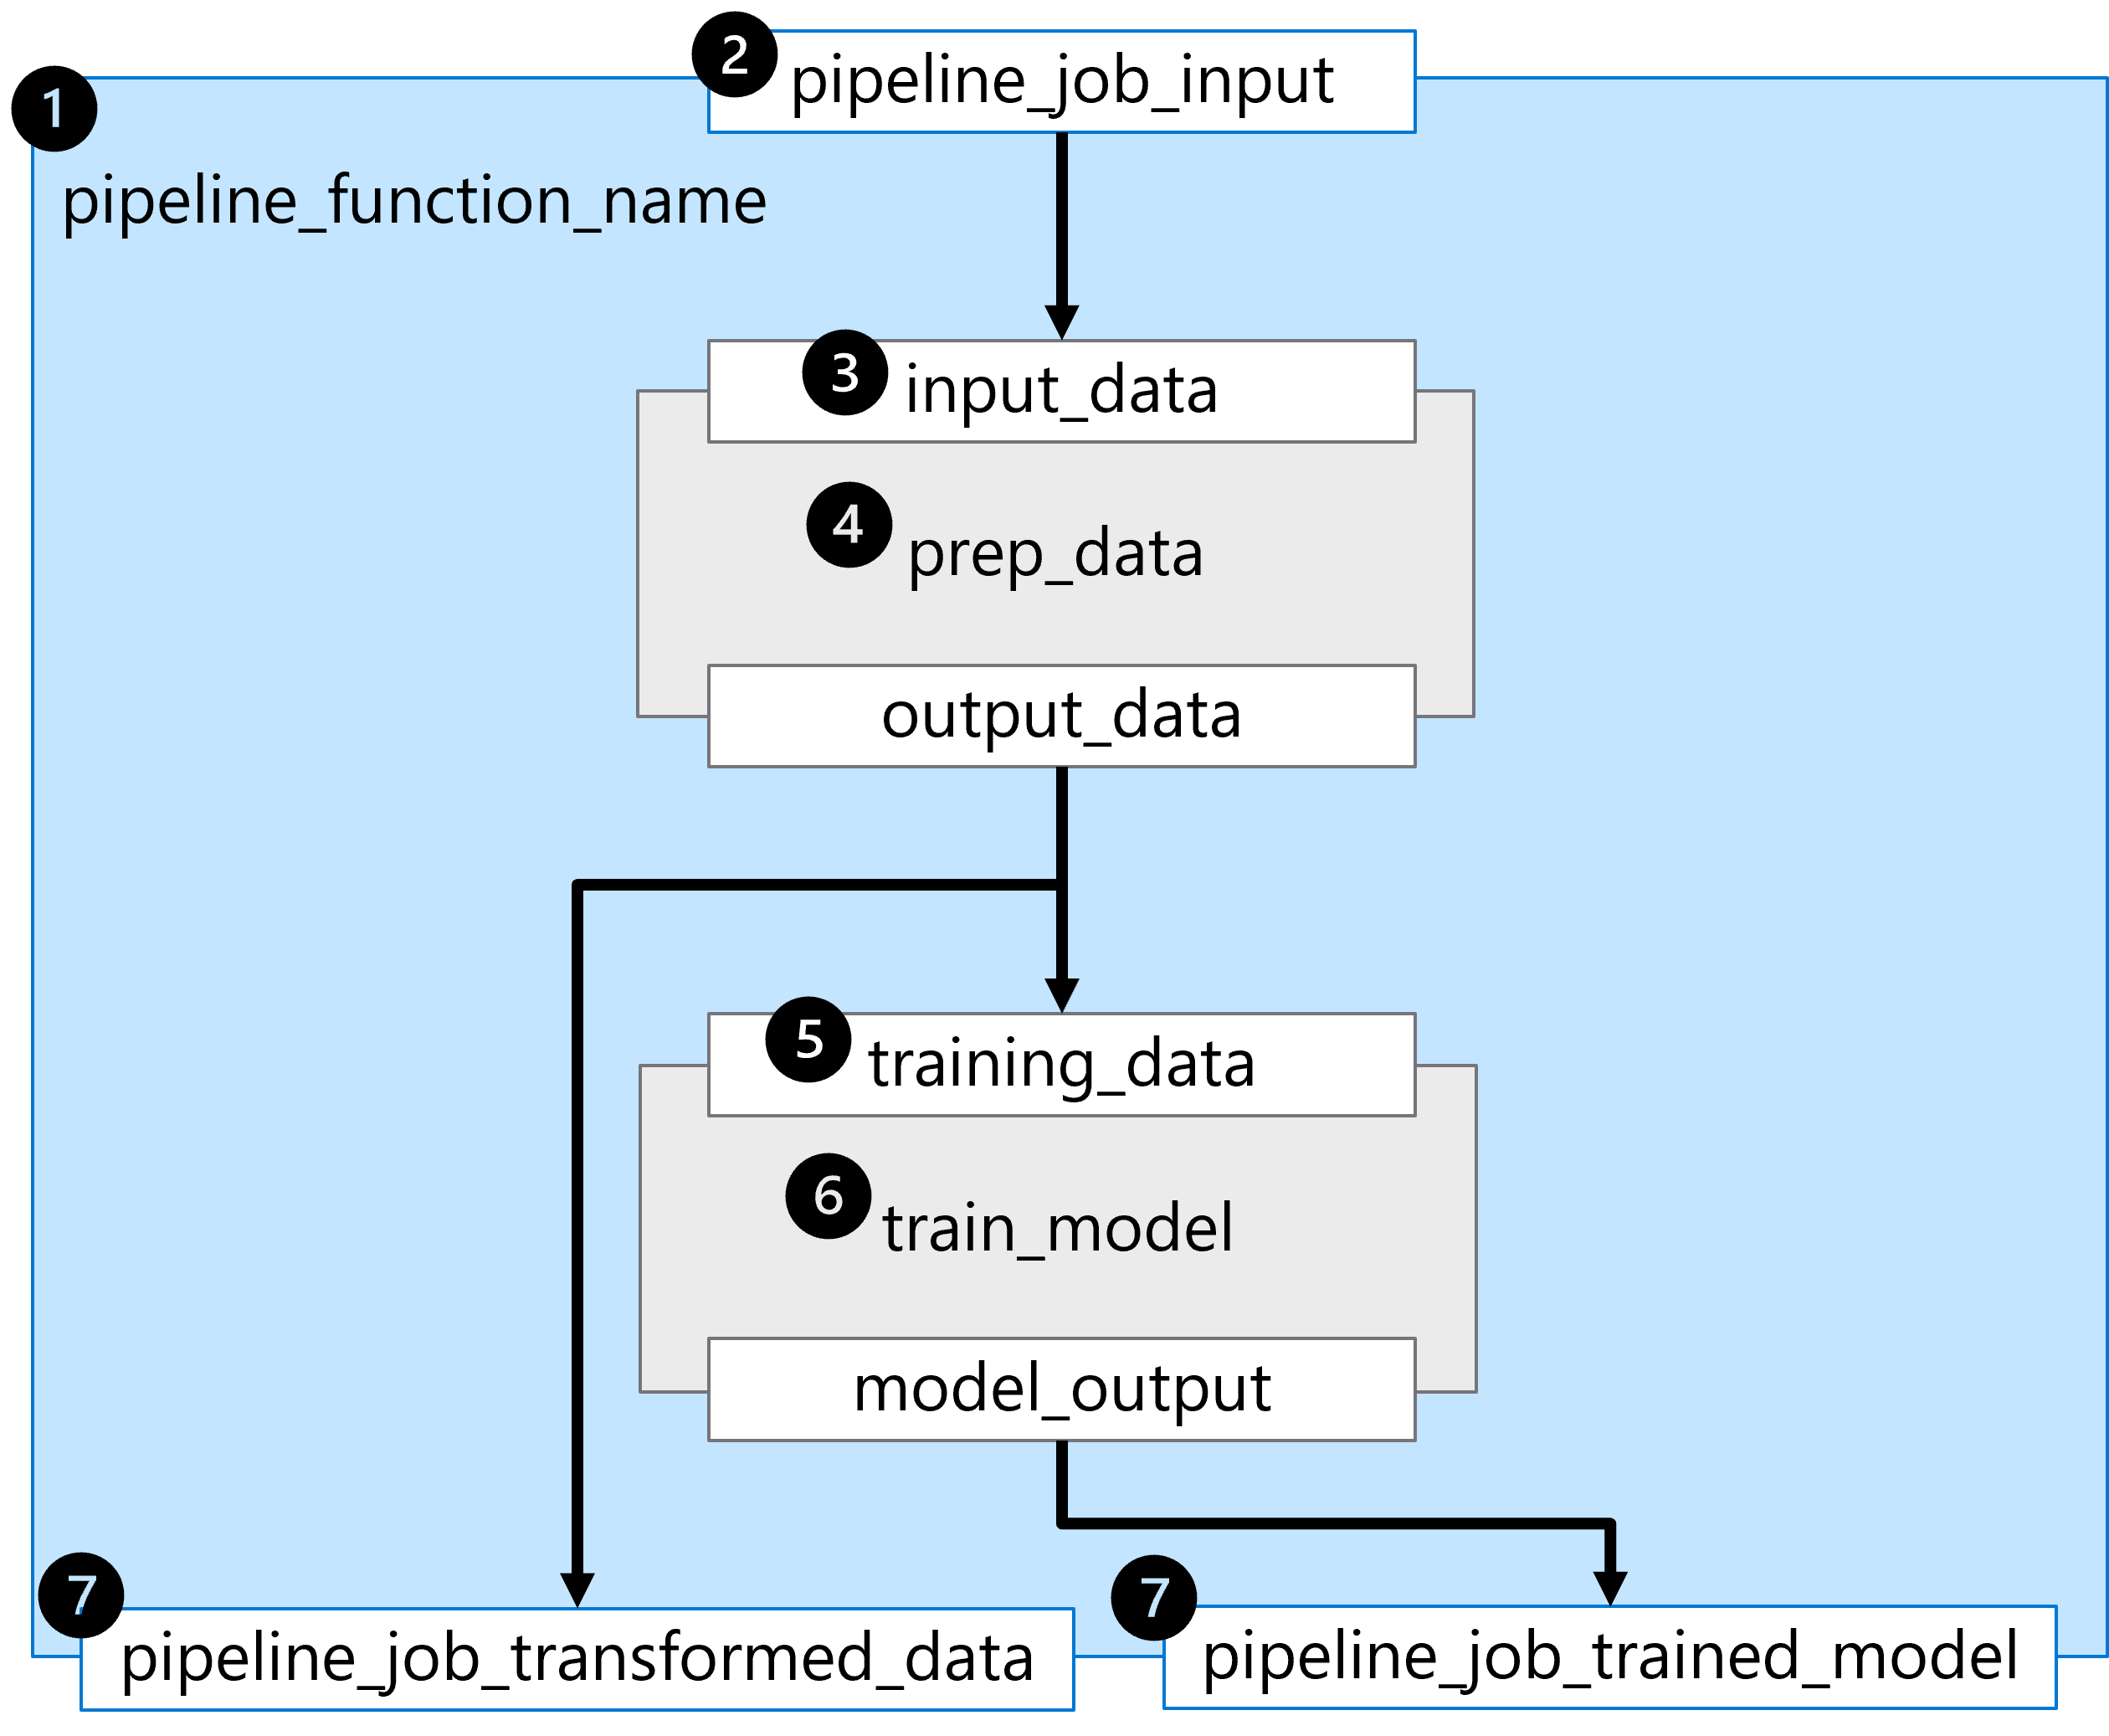


To understand the pipeline built in the example, let's explore it step by step:

1) The pipeline is built by defining the function pipeline_function_name.
2) The pipeline function expects pipeline_job_input as the overall pipeline input.
3) The first pipeline step requires a value for the input parameter input_data. The value for the input will be the value of pipeline_job_input.
4) The first pipeline step is defined by the loaded component for prep_data.
5) The value of the output_data of the first pipeline step is used for the expected input training_data of the second pipeline step.
6) The second pipeline step is defined by the loaded component for train_model and results in a trained model referred to by model_output.
7) Pipeline outputs are defined by returning variables from the pipeline function. There are two outputs:
    - pipeline_job_transformed_data with the value of prep_data.outputs.output_data
    - pipeline_job_trained_model with the value of train_model.outputs.model_output

In [ ]:
### run and schedule your pipeline job in Azure Machine Learning.

# Running a Pipeline Job (Once)
"After you’ve created your pipeline (using @pipeline() or YAML), here’s what you do:"

"Step 1: Optional Tweaks (Pipeline Settings)"

""" 
You can configure:

1) Change Output Storage Behavior
    pipeline_job.outputs.pipeline_job_transformed_data.mode = "upload"
    pipeline_job.outputs.pipeline_job_trained_model.mode = "upload"

2) Set Default Compute Target for All Steps
    pipeline_job.settings.default_compute = "aml-cluster"

3) Set Default Datastore for Output
    pipeline_job.settings.default_datastore = "workspaceblobstore"
"""

"Step 2: Submit the Job"

""" 
from azure.ai.ml import MLClient

pipeline_job = ml_client.jobs.create_or_update(
    pipeline_job,
    experiment_name="pipeline_job"
)

After submitting:
    The job appears in Azure ML Studio > Jobs.
    You'll see child jobs (each component) and their status.
    You can view logs, outputs, and parameters from the UI.
"""

# Scheduling a Pipeline Job (Repeat Automatically)
"If you want to automate your pipeline (e.g., retrain model every week), you can schedule it."

"Step 1: Set Up a Recurrence Trigger"

""" 
from azure.ai.ml.entities import RecurrenceTrigger

recurrence_trigger = RecurrenceTrigger(
    frequency="minute",   # Options: minute, hour, day, week, month
    interval=1            # Run every 1 minute (change as needed)
)
"""

"Step 2: Create a JobSchedule"

""" 
from azure.ai.ml.entities import JobSchedule

job_schedule = JobSchedule(
    name="run_every_minute",
    trigger=recurrence_trigger,
    create_job=pipeline_job
)

ml_client.schedules.begin_create_or_update(schedule=job_schedule).result()

Now your pipeline runs automatically every 1 minute!
"""

"Step 3: Disable or Delete a Schedule"

""" 
ml_client.schedules.begin_disable(name="run_every_minute").result()
ml_client.schedules.begin_delete(name="run_every_minute").result()
"""

# Summary of Running and Scheduling Pipeline Jobs

""" 
| Action                    | Code Snippet                                                     |
| ------------------------- | ---------------------------------------------------------------- |
| Set Output Upload Mode    | `pipeline_job.outputs.output_name.mode = "upload"`               |
| Set Default Compute       | `pipeline_job.settings.default_compute = "aml-cluster"`          |
| Set Default Datastore     | `pipeline_job.settings.default_datastore = "workspaceblobstore"` |
| Submit Job                | `ml_client.jobs.create_or_update(...)`                           |
| Schedule Job              | `JobSchedule(...) + begin_create_or_update(...)`                 |
| Disable & Delete Schedule | `begin_disable()` + `begin_delete()`                             |

"""

#### Section 4

In [ ]:
# What is MLflow and Why Use It?

""" 
MLflow is an open-source tool to track, log, and deploy machine learning models — regardless of which ML framework (like sklearn, TensorFlow, etc.) you use.

Why MLflow is Useful:
    It standardizes how models are saved (making models portable).
    You can easily move models between environments (e.g., from development to production).
    It tracks metrics, parameters, artifacts, and models.

In Azure Machine Learning, MLflow is integrated — meaning your models can be easily deployed with or without code!
"""

# How Model Logging Works with MLflow

""" 
When you log a model, MLflow saves it along with:
    Parameters (e.g., max_depth=5)
    Metrics (e.g., accuracy=0.92)
    Artifacts (e.g., model files, plots)
    A metadata file called MLmodel (important for traceability)

There are two main ways to log your models:
"""

# 1. Autologging (Easy Mode)

""" 
How it works:
    Just add mlflow.autolog() or mlflow.<framework>.autolog() before training
    When you run .fit(), everything gets logged automatically

Supported frameworks include:
    Keras: mlflow.keras.autolog()
    Scikit-learn: mlflow.sklearn.autolog()
    LightGBM: mlflow.lightgbm.autolog()
    XGBoost: mlflow.xgboost.autolog()
    TensorFlow: mlflow.tensorflow.autolog()
    PyTorch: mlflow.pytorch.autolog()
    ONNX: mlflow.onnx.autolog() 

This is the recommended and easy way if you don't need custom control.  
"""

# 2) Manual Logging (Custom Mode)

""" 
If you want full control, use manual logging:

Steps:
    Train your model normally.
    Use mlflow.log_param(), mlflow.log_metric() manually.
    Use mlflow.<framework>.log_model() to log your trained model.
    (Optional) Use signature to specify the expected input/output of the model.
"""

# What is Model Signature? Why it Matters?

""" 
Signature = defines input and output schema of your model
    This helps when you deploy your model, because:
        It knows what kind of data it expects (e.g., input features).
        It knows what kind of prediction/output to return.

"How to Add Signature:"

"Option 1: Infer Automatically"

    from mlflow.models.signature import infer_signature

    signature = infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, "my_model", signature=signature)

    
"Option 2: Manually Define Signature"   

    from mlflow.models.signature import ModelSignature
    from mlflow.types.schema import Schema, ColSpec

    input_schema = Schema([
        ColSpec("double", "sepal length (cm)"),
        ColSpec("double", "sepal width (cm)"),
        ColSpec("double", "petal length (cm)"),
        ColSpec("double", "petal width (cm)")
    ])
    output_schema = Schema([ColSpec("long")])

    signature = ModelSignature(inputs=input_schema, outputs=output_schema)
    mlflow.sklearn.log_model(model, "my_model", signature=signature)
Manual is useful when automatic inference doesn't get the exact types right (especially in production).
"""

# Artifact vs Model in MLflow

""" 
When you log a model:
    As Artifact: It's stored as a file (just a file in the folder).
    As Model: Stored with additional metadata (e.g., flavor, signature, versioning info). Recommended for deployment.
"""

# Summary of MLflow Logging

""" 
| Feature                 | Autologging        | Manual Logging                           |
| ----------------------- | ------------------ | ---------------------------------------- |
| Logging setup           | `mlflow.autolog()` | `mlflow.log_param()`, `log_model()` etc. |
| Control                 | Minimal            | High                                     |
| Signature customization | No                 | Yes                                      |
| Suitable for            | Quick experiments  | Production-ready model logging           |

"""

In [ ]:
# What is the MLflow Model Format?

""" 
When you log a model using MLflow, it stores everything related to the model in a folder. This includes:
    The trained model file (like .pkl, .onnx, .pt, etc.)
    The conda/virtualenv environment file
    The MLmodel file → ⭐This is the most important metadata file.

"""

# What is the MLmodel file?

""" 
It's a YAML file (like a configuration file) that tells:
    Where the model is saved (artifact_path)
    Which library was used to train the model (flavor)
    How to load/use the model (python_function details)
    Model run info (model_uuid, run_id)
    Signature → What inputs the model expects and what outputs it returns
"""

#  Example Breakdown (fastai model)

""" 
artifact_path: classifier
flavors:
  fastai:
    data: model.fastai
    fastai_version: 2.4.1
  python_function:
    data: model.fastai
    env: conda.yaml
    loader_module: mlflow.fastai
    python_version: 3.8.12
model_uuid: e694c...
run_id: e13d...
signature:
  inputs: '[{"type": "tensor", "tensor-spec": {"dtype": "uint8", "shape": [-1, 300, 300, 3]}}]'
  outputs: '[{"type": "tensor", "tensor-spec": {"dtype": "float32", "shape": [-1, 2]}}]'

  
What this means:
    Model is saved as model.fastai
    It's a fastai model AND can be used as a python function
    Python version: 3.8.12
    Input: 300x300 RGB image (for example, for image classification)
    Output: 2-class prediction (softmax, e.g., cat vs dog)
"""

# What is a Flavor?

""" 
A flavor = the ML library used to train the model.

| Flavor            | Example                                 |
| ----------------- | --------------------------------------- |
| `sklearn`         | Scikit-learn models                     |
| `keras`           | Keras deep learning models              |
| `xgboost`         | XGBoost tree models                     |
| `fastai`          | For image/text models using FastAI      |
| `python_function` | Default interface for all MLflow models |

python_function is important:
    It allows you to deploy the model anywhere (regardless of framework).
    It standardizes prediction with a predict() function.
"""

# What is a Signature?

""" 
Signature = Describes the model's input/output schema.

There are 2 types:
| Type         | Use Case                        | Example Input      |
| ------------ | ------------------------------- | ------------------ |
| Column-based | Tabular data (CSV, DataFrame)   | age, sex, bp, etc. |
| Tensor-based | Images, audio, text (nD arrays) | np.array, tensors  |

Example Signature (tabular):
    inputs: '[{"name": "age", "type": "long"}, {"name": "sex", "type": "long"}]'
    outputs: '[{"name": "target", "type": "long"}]'

Example Signature (image/tensor):
    inputs: '[{"type": "tensor", "tensor-spec": {"dtype": "uint8", "shape": [-1, 300, 300, 3]}}]'
    outputs: '[{"type": "tensor", "tensor-spec": {"dtype": "float32", "shape": [-1, 2]}}]'
"""

# Why Signature & Flavor Matter in Azure ML

""" 
When you deploy a model using no-code deployment in Azure ML:
    Azure will validate your inputs/outputs based on this signature.
    If you send the wrong format, the deployment will reject the request.
So:
    Correct flavor ensures it's loadable.
    Correct signature ensures it's deployable.
"""

# Final Takeaways

""" 
| Concept           | Why It Matters                                                |
| ----------------- | ------------------------------------------------------------- |
| `MLmodel`         | Metadata file storing model info like flavor, signature, path |
| `flavor`          | Tells MLflow how to load the model (e.g., sklearn, fastai)    |
| `signature`       | Ensures your input/output match during deployment             |
| `python_function` | Makes your model universally deployable in pipelines          |

"""

In [ ]:
# Why Register a Model?

""" 
In Azure Machine Learning, once a model is trained (inside a job), you can:
    Log the model using MLflow (while training)
    Register it = Save it permanently in the model registry, with a version, name, and metadata.

This makes the model:
    Searchable
    Version-controlled
    Easily deployable to endpoints later (no need to retrain)
"""

# Types of Models You Can Register in Azure ML

""" 
| Model Type | Description                                                           |
| ---------- | --------------------------------------------------------------------- |
| **MLflow** |   Most recommended. Tracked/logged using MLflow                       |
| **Custom** | Non-standard models (e.g., saved as job outputs in non-MLflow format) |
| **Triton** | Optimized for deep learning (TensorFlow/PyTorch)                      |
"""

# Steps to Register an MLflow Model (Using Python SDK)

"Step 1: Train and Log the Model"

""" 
from azure.ai.ml import command

job = command(
    code="./src",  # Folder where your script is
    command="python train-model-signature.py --training_data diabetes.csv",
    environment="AzureML-sklearn-0.24-ubuntu18.04-py37-cpu@latest",
    compute="aml-cluster",
    display_name="diabetes-train-signature",
    experiment_name="diabetes-training"
)

returned_job = ml_client.create_or_update(job)
print("Monitor your job at", returned_job.studio_url)

Result:
    Your model gets trained
    Artifacts (like model.pkl, MLmodel, etc.) are logged in job outputs using MLflow
"""

"Step 2: Register the Model"

""" 
After the job is complete:

from azure.ai.ml.entities import Model
from azure.ai.ml.constants import AssetTypes

job_name = returned_job.name  # Unique ID of job run

# Define the model
run_model = Model(
    path=f"azureml://jobs/{job_name}/outputs/artifacts/paths/model/",
    name="mlflow-diabetes",  # Name for model registry
    description="Model created from run.",
    type=AssetTypes.MLFLOW_MODEL,
)

# Register it!
ml_client.models.create_or_update(run_model)

Notes:
    path= points to the artifact folder where MLflow logged the model.
    type=AssetTypes.MLFLOW_MODEL tells AML that it's an MLflow model.
"""

# What Happens After Registration?

""" 
The model is added to the Models page in Azure ML Studio.
It gets:
    A unique version
    A searchable name
    Tags, description, and metadata (optional)
You can now deploy the model to an endpoint for predictions, without retraining!
"""

# Pro Tip:
"Even if your model was trained outside Azure ML, you can still register it by just giving the local path to the model directory (as long as it includes MLmodel file)."

# Summary of Model Registration Steps

""" 
| Step                    | Action Taken                                                  |
| ----------------------- | ------------------------------------------------------------- |
|   1 Submit training job | Using `command()` job                                         |
|   2 Log with MLflow     | Either autolog or manual logging                              |
|   3 Register the model  | With `Model()` object + `ml_client.models.create_or_update()` |
|   Done!                 | Model is in the registry, versioned, deployable               |

"""

In [ ]:
# What is Responsible AI?

""" 
Responsible AI refers to the ethical design, development, deployment, and governance of AI systems.

When you're training ML models (like predicting loans, hiring decisions, medical outcomes), those decisions can impact real people. So we need to make sure the AI is:
    Fair
    Safe
    Transparent
    Secure
    Accountable
"""

# Microsoft’s 5 Responsible AI Principles

"""
| Principle                       | What It Means                                                                        |
| ------------------------------- | ------------------------------------------------------------------------------------ |
| **1. Fairness & Inclusiveness** | Avoid bias. Treat all individuals or groups fairly.                                  |
| **2. Reliability & Safety**     | Model should work as intended—even in unexpected scenarios.                          |
| **3. Privacy & Security**       | Collect and store data responsibly. Respect user consent and ensure data protection. |
| **4. Transparency**             | Help users understand how the model makes decisions. Explain its behavior.           |
| **5. Accountability**           | Human-in-the-loop decision making. Own up to the impact of model decisions.          |
"""

# When Do These Principles Matter?

""" 
Hiring models → Avoid gender or racial bias
Loan approval → Ensure fair credit evaluation
Healthcare diagnostics → Must be reliable & explainable
User data → Ensure privacy is preserved
"""

# DP-100 Tip

""" 
1) Which Responsible AI principle ensures a model's behavior can be explained to affected users? - Transparency
2) What is the main goal of Responsible AI? - To ensure AI systems are ethical, fair, and accountable
3) Why is fairness important in Responsible AI? - To avoid bias and ensure equitable treatment of all individuals or groups
4) How does Responsible AI relate to data privacy? - It ensures responsible collection, storage, and use of data while respecting user consent.
5) What is the role of human oversight in Responsible AI? - To ensure accountability and make informed decisions based on model outputs
6) Which principle ensures fairness among different demographic groups? - Fairness & Inclusiveness
7) What is the purpose of the Reliability & Safety principle? - To ensure the model performs as expected, even in unexpected scenarios
8) How does Responsible AI address security concerns? - By implementing measures to protect data and ensure secure model deployment
9) What is the significance of the Accountability principle? - It emphasizes human oversight and responsibility for model decisions and their impacts
10) How can transparency in AI models benefit users? - It helps users understand how decisions are made, increasing trust and acceptance.
"""

In [ ]:
# What is the Responsible AI Dashboard?

""" 
The Responsible AI dashboard is a visual tool in Azure ML that helps you:
    Understand how your model makes decisions
    Check if it's biased or unfair 
    Explore errors and "what-if" scenarios 
It combines multiple insights to help ensure your model is ethical, fair, safe, and transparent.
"""

# Key Steps to Create the Dashboard

""" 
To build a Responsible AI Dashboard, you need to create a pipeline using built-in components provided by Azure. The structure is like this:

1. Start → RAI Dashboard Constructor
2. Add → One or more Insight Components (Explanation, Causal, etc.)
3. End → Gather RAI Insights
4. (Optional) Scorecard → Create shareable PDF summary
"""

# Available Insight Components

""" 
| Component Name          | What it Does                                                         |
| ----------------------- | -------------------------------------------------------------------- |
| **Add Explanation**     | Shows feature importance (which features influence predictions most) |
| **Add Causal**          | Analyzes cause-effect relationships using historical data            |
| **Add Counterfactuals** | Suggests minimal changes to get a different model output             |
| **Add Error Analysis**  | Helps identify where your model makes wrong predictions              |
"""

# Build and run the pipeline to create the Responsible AI dashboard

"""
To create the Responsible AI dashboard, you build a pipeline with the components you selected. When you run the pipeline, a Responsible dashboard (and scorecard) is generated and associated with your model.
After you've trained and registered a model in the Azure Machine Learning workspace, you can create the Responsible AI dashboard in three ways:
    Using the Command Line Interface (CLI) extension for Azure Machine Learning.
    Using the Python Software Development Kit (SDK).
    Using the Azure Machine Learning studio for a no-code experience.
"""

# Using the Python SDK to build and run the pipeline

""" 
To generate a Responsible AI dashboard, you need to:
    Register the training and test datasets as MLtable data assets.
    Register the model.
    Retrieve the built-in components you want to use.
    Build the pipeline.
    Run the pipeline.
"""

# How to Build the Pipeline (Using Python SDK)

""" 
1. Get the Required Components:

rai_constructor_component = ml_client_registry.components.get(
    name="microsoft_azureml_rai_tabular_insight_constructor", label="latest")

rai_explanation_component = ml_client_registry.components.get(
    name="microsoft_azureml_rai_tabular_explanation", label="latest")

rai_gather_component = ml_client_registry.components.get(
    name="microsoft_azureml_rai_tabular_insight_gather", label="latest")


2. Build the Pipeline:

from azure.ai.ml import Input, dsl
from azure.ai.ml.constants import AssetTypes

@dsl.pipeline(
    compute="aml-cluster",
    experiment_name="Create RAI Dashboard",
)
def rai_decision_pipeline(target_column_name, train_data, test_data):

    # Step 1: Construct base dashboard
    create_rai_job = rai_constructor_component(
        title="RAI dashboard diabetes",
        task_type="classification",
        model_info=expected_model_id,
        model_input=Input(type=AssetTypes.MLFLOW_MODEL, path=azureml_model_id),
        train_dataset=train_data,
        test_dataset=test_data,
        target_column_name="Predictions"
    )

    # Step 2: Add Explanation Insights
    explanation_job = rai_explanation_component(
        rai_insights_dashboard=create_rai_job.outputs.rai_insights_dashboard,
        comment="add explanation"
    )

    # Step 3: Gather Everything into Final Dashboard
    rai_gather_job = rai_gather_component(
        constructor=create_rai_job.outputs.rai_insights_dashboard,
        insight=explanation_job.outputs.explanation
    )

    rai_gather_job.outputs.dashboard.mode = "upload"

    return {
        "dashboard": rai_gather_job.outputs.dashboard,
    }

"""

# How to Run and View It

""" 
Once your pipeline is complete:
    Run the pipeline
    After success, go to the pipeline output or the model’s Responsible AI tab
    Open the dashboard to:
        See feature influences
        Try "what-if" inputs
        Identify errors and fairness issues
    You can also generate a Responsible AI scorecard (PDF) to share with your team.

"""

# Summary Flow

"""
Train Model → Register Model → Build Pipeline → Run Pipeline → View Dashboard
     ↓                             ↓                ↓
   Model                       Add RAI       Explore insights like
 (MLflow)                     Components     feature importance, fairness,
                                             counterfactuals, error zones
"""

In [ ]:
# What Is the Responsible AI Dashboard?

""" 
Once generated (via pipeline), this dashboard lets you visually analyze how your model behaves in terms of:
    Errors
    Explanations
    What-if inputs
    Causal relationships
Azure ML connects to a compute instance automatically to let you explore these insights interactively.
"""

# Components You Can Evaluate

""" 
1. Error Analysis
    Use this to detect biases or problem zones in your data. You get:

    Error Tree Map
        Visualizes combinations of subgroups (e.g., age > 60 AND BMI > 30) where your model makes many errors.
        Helps you find which kind of people/data samples the model struggles with.

    Error Heat Map
        Shows errors across one or two feature dimensions.
        Helpful for continuous features like blood sugar vs age.

        
2. Model Explanations (Feature Importance)
    This helps answer:
        "Which features are most influencing the model's predictions?"

    You'll see:
    Aggregate Feature Importance
        Shows global influence of each feature on overall predictions.
        E.g., “Glucose level” might have 65% impact, while “Age” only 10%.

    Individual Feature Importance
        Shows how each feature affected one specific prediction.
        Helps in understanding individual decisions (very useful for auditing).

    Often powered by mimic explainer — a simple model mimicking your complex model.


3. Counterfactuals (What-if Analysis)
    This lets you simulate:
        “What if this patient had a different BMI — would the prediction change?”

    You:
        Pick a data point.
        Define a desired prediction outcome.
        Get suggestions on what input features to change to reach that goal.

    Use this to:
        Recommend actionable decisions (e.g., for patients to lower risk)
        Debug edge cases

4. Causal Analysis
    This helps answer:
        “If we intervene and change this feature, will it cause a better outcome?”

    While explanations show correlation, causal analysis goes a step ahead and shows potential causality.


You'll see:
| Tab                           | Insight                                                          |
| ----------------------------- | ---------------------------------------------------------------- |
| **Aggregate causal effects**  | How average prediction changes if you change a treatment feature |
| **Individual causal effects** | Impact of feature changes for one specific sample                |
| **Treatment policy**          | Which groups benefit most from changing specific features        |

Example: “Changing ‘Insulin level’ in younger patients has the most positive impact on prediction.”
"""

# Practical Uses

"""
| Scenario                                 | Component                 |
| ---------------------------------------- | ------------------------- |
| Find subgroups with highest errors →     | **Error Tree / Heat Map** |
| See what features influenced the model → | **Explanations**          |
| Try “what if” scenario →                 | **Counterfactuals**       |
| Understand treatment effect →            | **Causal Analysis**       |
"""

# Summary of Responsible AI Dashboard

"""
| Feature         | Purpose                                  | View Type                     |
| --------------- | ---------------------------------------- | ----------------------------- |
| Error Analysis  | Find patterns where model performs badly | Tree map, heat map            |
| Explanations    | Understand model decisions               | Aggregate, individual views   |
| Counterfactuals | Simulate input changes                   | What-if UI                    |
| Causal Analysis | Estimate true cause-effect relationships | Aggregate, individual, policy |

"""


#### Section 5

In [ ]:
# What is a Managed Online Endpoint?

""" 
A real-time deployment option in Azure ML for inference (predictions).
Enables HTTPS-based interaction with deployed models.
Fully managed by Azure—you don't manage infrastructure.
"""

# Types of Online Endpoints

""" 
Managed Online Endpoints
    Azure handles compute provisioning, OS updates, etc.
    You only choose VM type and scaling.

Kubernetes Online Endpoints
    Requires user-managed Kubernetes cluster.
    Ideal for high scalability/control (used by DevOps teams).
"""

# How Real-Time Prediction Works

""" 
Client sends input data → HTTPS endpoint.

Endpoint uses scoring script to:
    Load trained model
    Predict (infer)
    Return output (label)
"""

# Required Components for Deployment

""" 
When deploying a model to a managed online endpoint, define:

1) Model Assets
    Registered model or pickle file

2) Scoring Script
    Script to load the model and return predictions

3) Environment
Required Python packages/libraries

4) Compute Configuration
    VM type + autoscale/min-max instance

Exception: If deploying an MLflow model, scoring script and environment are auto-generated.
"""

# Deployments & Blue/Green Strategy

""" 
1) A single endpoint can have multiple deployments:
    Blue: Current version (e.g., 90% traffic)
    Green: New version (e.g., 10% traffic)
2) Used to test new models safely and roll back if needed.
3) Helps in A/B testing and gradual rollout.
"""

# Authentication Modes

""" 
"key" - Key-based authentication (simple, often used)
"aml_token" - Azure ML token-based auth (secure, role-based)
"""

# Code Example to Create Endpoint

""" 
from azure.ai.ml.entities import ManagedOnlineEndpoint

endpoint = ManagedOnlineEndpoint(
    name="endpoint-example",
    description="Online endpoint",
    auth_mode="key",
)

ml_client.begin_create_or_update(endpoint).result()

"""

# Key Takeaways

""" 
- Use Managed Online Endpoints for fast testing and easy deployment.
- Use blue/green deployment for safe upgrades.
- For MLflow models, deployment is simplified—no script/env required.
- All interaction is over HTTPS—real-time, secure inferencing.
"""

In [ ]:
# Why use MLflow models?

""" 
- Azure automatically generates:
    Scoring script
    Environment
- Simplifies deployment → Faster & easier.
"""

# What do you need before deploying?

""" 
- A created Managed Online Endpoint
- Trained model in MLflow format, including:
    MLmodel file
    Saved model artifacts (locally or registered)
- Compute configuration:
    instance_type (e.g., Standard_F4s_v2)
    instance_count (number of VM instances)
"""

# Python SDK Code: Register and Deploy

""" 
from azure.ai.ml.entities import Model, ManagedOnlineDeployment
from azure.ai.ml.constants import AssetTypes

# Register the MLflow model
model = Model(
    path="./model",  # must include MLmodel file
    type=AssetTypes.MLFLOW_MODEL,
    description="my sample mlflow model",
)

# Define the deployment
blue_deployment = ManagedOnlineDeployment(
    name="blue",
    endpoint_name="endpoint-example",
    model=model,
    instance_type="Standard_F4s_v2",
    instance_count=1,
)

# Deploy model to the endpoint
ml_client.online_deployments.begin_create_or_update(blue_deployment).result()

"""

# Traffic Routing

""" 
Assign traffic percentage to each deployment:

endpoint.traffic = {"blue": 100}  # 100% traffic to 'blue'
ml_client.begin_create_or_update(endpoint).result()
"""

# To Delete Endpoint and All Deployments

'ml_client.online_endpoints.begin_delete(name="endpoint-example")'

# Key Points for DP-100

""" 
- MLflow models don’t need custom score.py or conda.yaml.
- MLmodel file is mandatory.
- Use ManagedOnlineDeployment for deployment.
- Use Model() for registering local model artifacts.
- Traffic routing is flexible and critical for safe rollouts.
"""

In [ ]:
# Purpose of Testing Managed Online Endpoints

""" 
After deploying a real-time ML model to an endpoint, you must test it to ensure:
    It works correctly
    It returns predictions for new input data
"""

# Testing Options

""" 
1) Azure ML Studio (GUI)
    Navigate to Endpoints → Real-time endpoints.
    Select your deployed endpoint to:
        Review deployment logs
        Test by sending sample input data
        View predictions directly in the browser

2) Azure ML Python SDK (Code-based)
Input Format: JSON
Use the following structure to send batch input to the model:
{
  "data": [
    [0.1, 2.3, 4.1, 2.0],
    [0.2, 1.8, 3.9, 2.1]
  ]
}

Each inner list = 1 input row/case
JSON format must align with the model's expected input structure
"""

# Python Code to Invoke Endpoint

""" 
response = ml_client.online_endpoints.invoke(
    endpoint_name=online_endpoint_name,
    deployment_name="blue",
    request_file="sample-data.json",
)

if response[1] == '1':
    print("Yes")
else:
    print("No")

Notes:
    endpoint_name: Name of the online endpoint.
    deployment_name: Specific deployment to test (e.g., "blue").
    request_file: JSON file containing input data.
"""

# Typical Flow

""" 
Send request in JSON → Endpoint (via GUI or SDK)
Endpoint loads deployed model → Performs inference
Returns prediction(s) in JSON format
Output = Classification/Regression result per row
"""

# DP-100 Key Concepts to Remember

""" 
Use invoke() to call real-time endpoints.
Send input as JSON file, not raw list or CSV.
Always validate endpoint with test cases before using it in production.
Azure handles model loading and prediction on deployed VM.
"""

In [ ]:
# What Are Batch Endpoints?

""" 
- Batch endpoints are used for asynchronous, large-scale predictions.
- Ideal for processing many data records at once (e.g., CSVs, Parquet files).
- Useful for offline inference, data pipelines, or scheduled scoring.
- Can be integrated with:
    Azure Synapse
    Azure Data Factory
    Azure Databricks
"""

# How It Works

""" 
- You send a request to a Batch Endpoint (HTTPS).
- A Batch Scoring Job is triggered in the Azure ML workspace.
- The job runs on a compute cluster (e.g., AML Compute).
- Results are saved to a connected datastore.
"""

# Key Components
""" 
| Component           | Description                                          |
| ------------------- | ---------------------------------------------------- |
| **Batch Endpoint**  | Logical HTTPS endpoint                               |
| **Deployment**      | The specific model and config used for scoring       |
| **Compute Cluster** | Executes the batch job (parallel processing support) |
| **Input/Output**    | Points to data in the connected datastore            |
"""

# Create a Batch Endpoint

""" 
from azure.ai.ml.entities import BatchEndpoint

endpoint = BatchEndpoint(
    name="endpoint-example",
    description="A batch endpoint",
)

ml_client.batch_endpoints.begin_create_or_update(endpoint)

Endpoint name must be globally unique in the Azure region.
"""

# Deploy a Model to Batch Endpoint

""" 
You can deploy multiple models to a batch endpoint.
Specify a default deployment that will be used unless otherwise specified.
"""

# Compute for Batch Scoring (AML Compute Cluster)

""" 
from azure.ai.ml.entities import AmlCompute

cpu_cluster = AmlCompute(
    name="aml-cluster",
    type="amlcompute",
    size="STANDARD_DS11_V2",
    min_instances=0,
    max_instances=4,
    idle_time_before_scale_down=120,  # seconds
    tier="Dedicated",
)

cpu_cluster = ml_client.compute.begin_create_or_update(cpu_cluster)

Tip:
Use more than 1 max instance to enable parallel scoring.
"""

# DP-100 Key Concepts to Remember

""" 
- Batch endpoints = asynchronous, designed for bulk inference.
- Unlike online endpoints, they do not return predictions immediately.
- Integration friendly: Easily used in data pipelines.
- Backed by scalable compute clusters (min/max instances).
- Each scoring job stores results in the Azure ML datastore.
"""

In [ ]:
### Deploying MLflow Models to Batch Endpoints in Azure Machine Learning

# Overview

""" 
- Azure ML supports deploying MLflow models to batch endpoints.
- MLflow simplifies deployment:
        No scoring script
        No environment YAML
- Automatically generates logic needed for batch scoring.
"""

# Registering an MLflow Model

""" 
Before deployment:
    MLflow model must be registered in Azure ML workspace.
    Must include MLmodel file in model folder.

from azure.ai.ml.entities import Model
from azure.ai.ml.constants import AssetTypes

model_name = 'mlflow-model'
model = ml_client.models.create_or_update(
    Model(name=model_name, path='./model', type=AssetTypes.MLFLOW_MODEL)
)


AssetTypes.MLFLOW_MODEL → ensures correct format
./model → folder must contain MLmodel descriptor
"""

# Deploying the Model to a Batch Endpoint

"""
Use BatchDeployment class to deploy the registered model:

from azure.ai.ml.entities import BatchDeployment, BatchRetrySettings
from azure.ai.ml.constants import BatchDeploymentOutputAction

deployment = BatchDeployment(
    name="forecast-mlflow",
    description="A sales forecaster",
    endpoint_name=endpoint.name,       # existing batch endpoint
    model=model,
    compute="aml-cluster",
    instance_count=2,
    max_concurrency_per_instance=2,
    mini_batch_size=2,
    output_action=BatchDeploymentOutputAction.APPEND_ROW,
    output_file_name="predictions.csv",
    retry_settings=BatchRetrySettings(max_retries=3, timeout=300),
    logging_level="info",
)

ml_client.batch_deployments.begin_create_or_update(deployment)

"""

# Important Configuration Parameters

""" 
| Parameter                      | Description                                        |
| ------------------------------ | -------------------------------------------------- |
| `instance_count`               | Number of nodes in compute cluster                 |
| `max_concurrency_per_instance` | Parallel runs per node                             |
| `mini_batch_size`              | Files per scoring script execution                 |
| `output_action`                | `APPEND_ROW` or `SUMMARY_ONLY`                     |
| `output_file_name`             | Output file for predictions                        |
| `retry_settings`               | Auto retry config (e.g., 3 retries, 5 min timeout) |

Batch inference runs asynchronously → outputs go to a datastore location configured with the batch endpoint.
"""

# Key DP-100 Takeaways
""" 
- MLflow = no manual score/environment files for batch/online deployment.
- Use BatchDeployment and BatchEndpoint classes.
- Choose append_row when outputting row-wise predictions.
- Batch jobs can run in parallel using multiple compute nodes.
- Ensure the model folder has a valid MLmodel descriptor.
- You can specify retry settings to make jobs more robust.
"""

In [ ]:
### Deploying a Custom Model to a Batch Endpoint in Azure Machine Learning

# When to Use Custom Model Deployment

""" 
Use this approach when:
    You do not use MLflow format for your model.
    You want full control over how the model is loaded and predictions are made.
"""

# What You Must Provide:

"""
- Scoring script (score.py)
- Custom environment (conda.yaml)
- Deployment configuration using BatchDeployment
"""

# Scoring Script Requirements

""" 
Must have two functions:

def init():  # Runs ONCE at job start
    global model
    model_path = os.path.join(os.environ["AZUREML_MODEL_DIR"], "model")
    model = mlflow.pyfunc.load_model(model_path)

def run(mini_batch):  # Runs per mini batch
    resultList = []
    for file_path in mini_batch:
        data = pd.read_csv(file_path)
        pred = model.predict(data)
        df = pd.DataFrame(pred, columns=["predictions"])
        df["file"] = os.path.basename(file_path)
        resultList.extend(df.values)
    return resultList

Key Notes:
    Use AZUREML_MODEL_DIR to get model path.
    Return a list or DataFrame from run().
    Model can be loaded using mlflow or any other loader.
"""

# Creating the Environment

""" 
Example conda-env.yml:

name: basic-env-cpu
channels:
  - conda-forge
dependencies:
  - python=3.8
  - pandas
  - pip
  - pip:
      - azureml-core
      - mlflow

Register environment in Azure ML:

from azure.ai.ml.entities import Environment

env = Environment(
    image="mcr.microsoft.com/azureml/openmpi3.1.2-ubuntu18.04",
    conda_file="./src/conda-env.yml",
    name="deployment-environment",
    description="Env from Docker + Conda",
)
ml_client.environments.create_or_update(env)

"""

# Configure and Deploy the Custom Model

"Deployment Code:"

""" 
from azure.ai.ml.entities import BatchDeployment, BatchRetrySettings
from azure.ai.ml.constants import BatchDeploymentOutputAction

deployment = BatchDeployment(
    name="forecast-mlflow",
    description="A sales forecaster",
    endpoint_name=endpoint.name,
    model=model,
    compute="aml-cluster",
    code_path="./code",  # path with score.py
    scoring_script="score.py",
    environment=env,
    instance_count=2,
    max_concurrency_per_instance=2,
    mini_batch_size=2,
    output_action=BatchDeploymentOutputAction.APPEND_ROW,
    output_file_name="predictions.csv",
    retry_settings=BatchRetrySettings(max_retries=3, timeout=300),
    logging_level="info",
)

ml_client.batch_deployments.begin_create_or_update(deployment)
"""

# Key DP-100 Takeaways

""" 
| Concept             | Description                                      |
| ------------------- | ------------------------------------------------ |
| `init()`            | Loads model once at start                        |
| `run()`             | Called on each mini batch                        |
| `AZUREML_MODEL_DIR` | Points to registered model file location         |
| `Environment`       | Must include all dependencies and `azureml-core` |
| `BatchDeployment`   | Used to deploy custom models to batch endpoint   |
| `output_action`     | Choose `APPEND_ROW` to write per-row predictions |

"""

In [ ]:
### Invoking and Troubleshooting Batch Endpoints in Azure Machine Learning

# Invoking a Batch Endpoint

""" 
What happens when you invoke?
- You trigger a pipeline job in Azure ML.
- This job:
    Uses the registered model
    Scores a batch of input data
    Writes predictions to the default datastore
"""

# Prepare and Use Input Data

""" 
1) Register your input folder as a Data Asset:
Example: "azureml:new-data:1"

    from azure.ai.ml import Input
    from azure.ai.ml.constants import AssetTypes

    input = Input(type=AssetTypes.URI_FOLDER, path="azureml:new-data:1")

2) Trigger the batch job using Python SDK:
job = ml_client.batch_endpoints.invoke(
    endpoint_name=endpoint.name,
    input=input
)

Note:
    - You can also trigger the job using Azure ML Studio UI (Batch endpoint tab).
    - You'll see the job listed under “Jobs” in the endpoint details.
"""

# Where Are the Predictions Stored?

""" 
- By default: in the Azure ML default datastore.
- The location can be customized during deployment config.
"""

# Troubleshooting a Batch Endpoint

""" 
- Each batch scoring job creates a pipeline job that can have multiple child jobs.
- To troubleshoot:
    Go to Azure ML Studio → Jobs tab.
    Click the parent pipeline job.
    Inspect the child job that runs the scoring script.
    Open the Outputs + logs tab.
"""

# Log Files in /logs/user/ folder
""" 
| File                             | Description                                                     |
| -------------------------------- | --------------------------------------------------------------- |
| **job\_error.txt**               | Summarizes script errors (e.g., missing imports, wrong formats) |
| **job\_progress\_overview\.txt** | Tracks number of mini-batches processed                         |
| **job\_result.txt**              | Shows init() and run() errors in scoring script                 |
"""

# DP-100 Key Concepts
""" 
| Concept                             | Description                                            |
| ----------------------------------- | ------------------------------------------------------ |
| `Input(type=AssetTypes.URI_FOLDER)` | Use this to pass folder-based input                    |
| Pipeline Job                        | Triggered when you invoke batch endpoint               |
| Job Monitoring                      | All job runs visible under the endpoint’s "Jobs" tab   |
| Logs                                | Navigate to child job → Outputs + logs → `/logs/user/` |
| Data Output                         | Stored in default datastore unless specified otherwise |

"""

#### Section 6